In [ ]:
!pip install gdown
!gdown --id 13-2nYowOW1lxNkEOGo535zJGluJ3au-B

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13-2nYowOW1lxNkEOGo535zJGluJ3au-B
To: /content/Airline_review.csv
100% 20.5M/20.5M [00:00<00:00, 185MB/s]


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, mean_squared_error, classification_report, recall_score, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.simplefilter('ignore')

## Tóm tắt
Mục đích của notebook này là để:
- Cung cấp EDA về những bài đánh giá các chuyến bay.
- Xác minh những yếu tố có ảnh hưởng tới lượt đánh giá của các hãng hàng không.
- Thực hiện việc phân tích chuỗi thời gian với các đánh giá của các chuyến bay.
- Thực hiện việc phân cụm dựa trên các loại khách hàng và lượt đánh giá của họ.


## Dữ liệu

Dữ liệu về các chuyến bay được lấy từ website: https://www.airlinequality.com/review-pages/a-z-airline-reviews/

Dữ liệu được cào về và tổng hợp lại trên trang Kaggle theo đường link sau: https://www.kaggle.com/datasets/juhibhojani/airline-reviews

Các thuộc tính có trong tập dữ liệu được liệt ra dưới đây:

|Thuộc tính|Ý nghĩa|
|:---:|:---|
|Overall_Rating|Đánh giá tổng quan của khách hàng|
|Review_Title|Tiêu đề của bài đánh giá|
|Airline Name|Tên của hãng hàng không|
|Review Date|Thời gian mà bài đánh giá được đăng lên|
|Verified|Bài đánh giá có được xác thực hay không|
|Review|Nội dung bài đáng giá|
|TypeOfTraveller|Loại hình di chuyển (Công tác, Du lịch...)|
|SeatType|Loại vé (Phổ thông, Thương gia...)|
|Route|Chặng bay|
|DateFlown|Thời gian diễn ra chuyến bay|
|SeatComfort|Đánh giá về độ thoải mái của ghế|
|CabinStaffService|Đánh giá về sự phục vụ của nhân viên Cabin|
|GroundService|Đánh giá về sự phục vụ của nhân viên mặt đất|
|ValueForMoney|Đánh giá về chất lượng so với giá tiền|
|Recommended|Liệu khách có giới thiệu về hãng không?|
|Aircraft|Loại máy bay được sử dụng|
|Food&Beverages|Đánh giá về dịch vụ đồ ăn nước uống trên chuyến bay|
|InflightEntertainment|Đánh giá về dịch vụ giải trí trên chuyến bay|
|Wifi&Connectivity|Đánh giá về dịch vụ Wifi trên chuyến bay|



### Đọc dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Airline_review.csv')
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

### Đánh giá các giá trị rỗng

In [ ]:
df_na = df.isna().sum()
df_na

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [ ]:
print('Percent of NaN value for each column:')
for col in df.columns:
    msg = '{:<18}\t : {:.2f}%'.format(col,100*(df[col].isnull().sum()/df[col].shape[0]))
    print(msg)

Percent of NaN value for each column:
Unnamed: 0        	 : 0.00%
Airline Name      	 : 0.00%
Overall_Rating    	 : 0.00%
Review_Title      	 : 0.00%
Review Date       	 : 0.00%
Verified          	 : 0.00%
Review            	 : 0.00%
Aircraft          	 : 69.23%
Type Of Traveller 	 : 16.13%
Seat Type         	 : 4.73%
Route             	 : 16.52%
Date Flown        	 : 16.20%
Seat Comfort      	 : 17.93%
Cabin Staff Service	 : 18.39%
Food & Beverages  	 : 37.42%
Ground Service    	 : 20.69%
Inflight Entertainment	 : 53.26%
Wifi & Connectivity	 : 74.45%
Value For Money   	 : 4.60%
Recommended       	 : 0.00%


Chúng ta có thể thấy từ việc kiểm tra dữ liệu rằng:
- Các thuộc tính như `Aircraft`, `Inflight Entertainment`, `Wifi & Connectivity` có hơn 50% giá trị còn thiếu.
- Các thuộc tính như `Value for Money` và `Seat Type`, có ít hơn 5% giá trị NaN &rarr; có thể được quy đổi bằng các giá trị trung bình.
- `Review Date` phải được chuyển đổi thành ngày giờ và để có thể được phân tách sâu hơn theo kiểu Time-Series.
- Chất lượng dữ liệu trong `Date Flown` phải được xem xét kỹ lưỡng để chứng minh hoặc phủ nhận giả định rằng các giá trị còn thiếu từ `Date Flown` có thể được ánh xạ từ `Review Date`.
- Thuộc tính `Overall_Rating` nên chuyển sang dạng số để có thể thao tác với biểu đồ đánh giá trung bình.

## Làm sạch dữ liệu


### Xử lý dữ liệu 'n' trong thuộc tính Overall_Rating

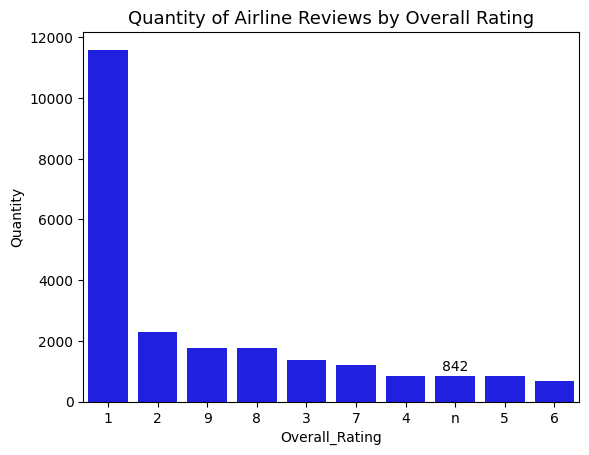

In [ ]:
dfg = df['Overall_Rating'].value_counts().reset_index()
dfg.columns = ['Overall_Rating', 'Quantity']

ax = sns.barplot(data=dfg, x='Overall_Rating', y='Quantity', color='blue')

p = ax.patches[7]
ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 300),
            ha='center', va='center', fontsize=10, color='black')

plt.title('Quantity of Airline Reviews by Overall Rating', fontsize=13)
plt.show()

Như chúng ta có thể thấy, số lượng bản ghi `Overall_Rating` = 'n' không đáng kể (842 trên 23171 - ít hơn 4%) và về mặt lý thuyết, chúng ta có thể thực hiện việc gán 'n' với giá trị xuất hiện nhiều nhất (1). Trước khi thực hiện quyết định cuối cùng về nó, hãy xem xét số lượng giá trị còn thiếu trong các bản ghi với `Overall_Rating` = 'n'

In [ ]:
df_n = df[df["Overall_Rating"] == 'n']
print('Percent of NaN value:')
for col in df_n.columns:
    msg = '{:<18}\t : {:.2f}%'.format(col,100*(df_n[col].isnull().sum()/df_n[col].shape[0]))
    print(msg)

Percent of NaN value:
Unnamed: 0        	 : 0.00%
Airline Name      	 : 0.00%
Overall_Rating    	 : 0.00%
Review_Title      	 : 0.00%
Review Date       	 : 0.00%
Verified          	 : 0.00%
Review            	 : 0.00%
Aircraft          	 : 100.00%
Type Of Traveller 	 : 100.00%
Seat Type         	 : 62.71%
Route             	 : 100.00%
Date Flown        	 : 100.00%
Seat Comfort      	 : 78.98%
Cabin Staff Service	 : 78.98%
Food & Beverages  	 : 78.98%
Ground Service    	 : 100.00%
Inflight Entertainment	 : 79.10%
Wifi & Connectivity	 : 100.00%
Value For Money   	 : 62.35%
Recommended       	 : 0.00%


Như chúng ta có thể thấy, số lượng giá trị bị thiếu trong các cột khác của bản ghi có `Overall_Rating` = 'n' cao hơn nhiều so với toàn bộ tập dữ liệu.

Ta cũng có thể thấy rằng:
- `Overall_Rating` phải khá thấp đối với các bản ghi có `Recommended` = 'no'.
- `Overall_Rating` phải khá cao đối với các bản ghi có `Recommended` = 'yes'.

Hãy cùng xem lại số lượng bản ghi với `Overall_Rating` = 'n'.

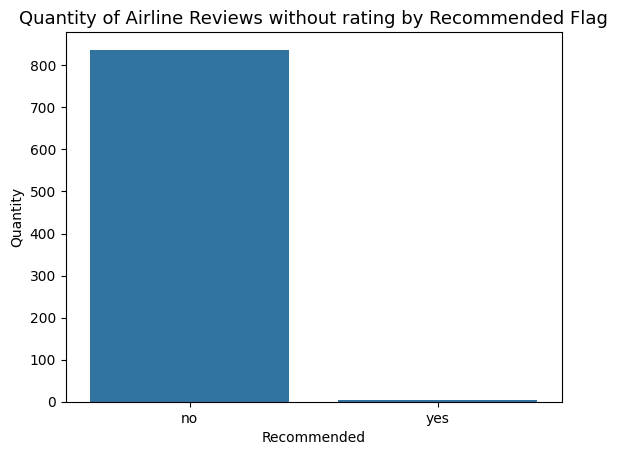

In [ ]:
dfg = df_n['Recommended'].value_counts().reset_index()
dfg.columns = ['Recommended', 'Quantity']

ax = sns.barplot(data=dfg, x='Recommended', y='Quantity')

plt.title('Quantity of Airline Reviews without rating by Recommended Flag', fontsize=13)
plt.show()

Chúng ta thấy rằng:
- phần lớn các bản ghi có `Recommended` = 'no'.

Ta sẽ xem xét để biết giá trị xuất hiện nhiều nhất để có thể gán cho 'n'.

In [ ]:
agg_data = df.groupby(['Overall_Rating', 'Recommended']).size().reset_index(name='Review_count')

agg_data = agg_data.sort_values(by=["Overall_Rating", "Review_count"])

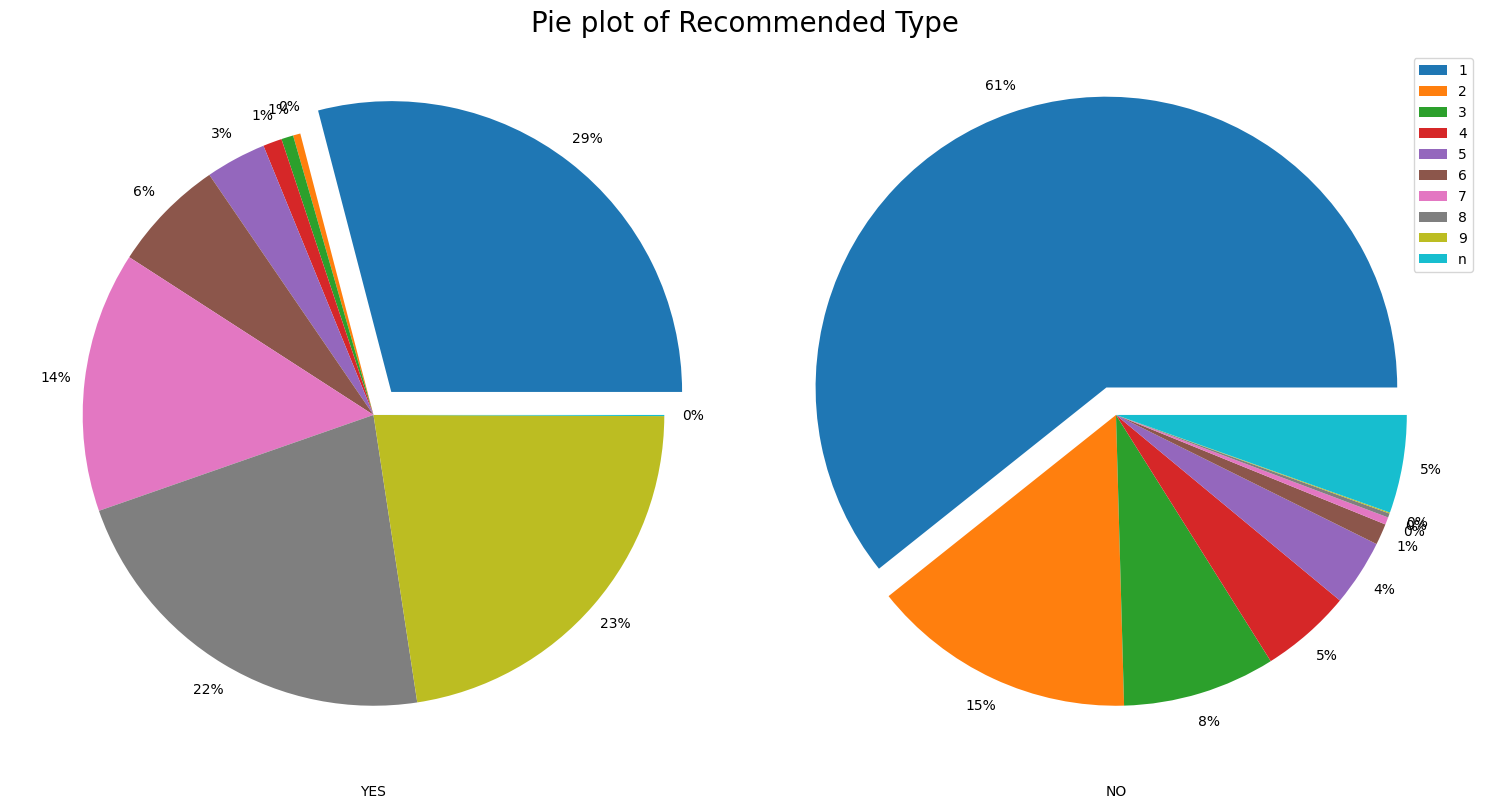

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Pie plot of Recommended Type', fontsize=20)
labels = agg_data[agg_data['Recommended'] == 'yes']['Overall_Rating']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.subplot(1, 2, 1)
plt.pie(agg_data[agg_data['Recommended'] == 'yes']['Review_count'],
        autopct='%.0f%%', pctdistance=1.1, explode=explode)
plt.xlabel('YES')

plt.subplot(1, 2, 2)
plt.pie(agg_data[agg_data['Recommended'] == 'no']['Review_count'],
        autopct='%.0f%%', pctdistance=1.1, explode=explode)
plt.xlabel('NO')

plt.tight_layout()
plt.legend(labels)
plt.show()

Chúng ta thấy giá trị 1 xuất hiện nhiều nhất nên ta sẽ gán 'n' bằng 1 và ta sẽ thay đổi dạng `Overall_Rating` sang dạng số.

In [ ]:
def map_n_rating(x):
    res = x
    if x == 'n':
        res = '1'

    return res

df['Overall_Rating'] = df['Overall_Rating'].apply(map_n_rating)
df['Overall_Rating'] = df['Overall_Rating'].astype(int)

Chúng ta cũng có thể thấy nhiều quan sát thú vị về mối quan hệ giữa `Recommended` và `Overall_Rating`
- 75% bài đánh giá có `Overall_Rating` <=5 (xếp hạng khá thấp, IMHO).
- Trong các đánh giá có `Recommended` = 'no', có một phần nhỏ các đánh giá có xếp hạng khá cao (6-8); sẽ rất thú vị nếu xem xét những đánh giá 'lệch lạc' này một cách chi tiết hơn sau này.
- Trong các đánh giá có `Recommended` = 'yes', có một phần nhỏ các đánh giá có xếp hạng khá thấp (1-5); sẽ rất thú vị nếu xem xét những đánh giá 'lệch lạc' này một cách chi tiết hơn sau này.
### Xử lý các giá trị bị thiếu của thuộc tính Value For Money

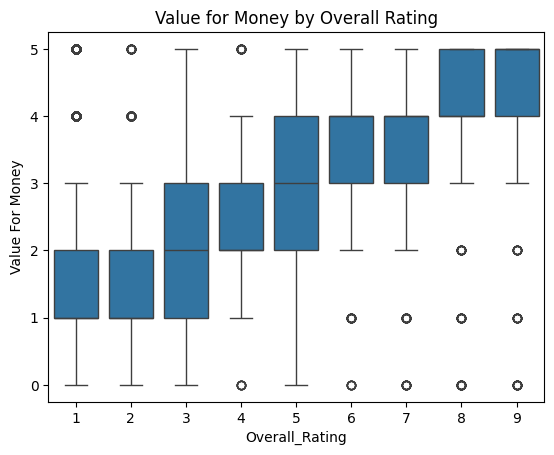

In [ ]:
plt.title('Value for Money by Overall Rating')
sns.boxplot(x='Overall_Rating', y='Value For Money', data=df)
plt.show()

Chúng ta thấy rằng:
- giá trị trung bình cho `Overall_Rating` = 1 hoặc 2 là 1.
- giá trị trung bình cho `Overall_Rating` = 3 hoặc 4 là 2.
- giá trị trung bình cho `Overall_Rating` = 5 là 3.
- giá trị trung bình cho `Overall_Rating` = 6 đến 8 là 4.
- giá trị trung bình của `Overall_Rating` = 9 là 5.

Những phát hiện ở trên sẽ giúp chúng ta xác định chính xác các giá trị còn thiếu cho `Value For Money`.

Ngoài ra, chúng ta đã phát hiện các hãng hàng không 'ngoại lệ' nổi bật trong phạm vi thống kê `Value For Money` cho mỗi cấp bậc `Overall_Rating`. Đó là:
- Các hãng hàng không có đánh giá với `Overall_Rating` = 9 và `Value For Money` thấp. (chất lượng so với giá tiền thấp mà tổng quan đánh giá lại cao)
- Các hãng hàng không có đánh giá với `Overall_Rating` = 1 và `Value For Money` cao. (chất lượng so với giá tiền cao mà tổng quan đánh giá lại thấp)

In [ ]:
df[(df['Overall_Rating'] == 9) & (df['Value For Money'] <= 3)]['Airline Name'].value_counts().head()

Airline Name
Bulgaria Air        6
QantasLink          5
Vistara             3
Virgin Australia    3
SilkAir             2
Name: count, dtype: int64

In [ ]:
df[(df['Overall_Rating'] == 1) & (df['Value For Money'] > 3)]['Airline Name'].value_counts().head()

Airline Name
Hainan Airlines           48
ANA All Nippon Airways    45
Air Astana                39
Garuda Indonesia          37
Thai Smile Airways        34
Name: count, dtype: int64

In [ ]:
value_for_money_median_map = {
    1: 1,
    2: 1,
    3: 2,
    4: 2,
    5: 3,
    6: 4,
    7: 4,
    8: 4,
    9: 5,
}

df['Median_value_for_money'] = df['Overall_Rating'].map(value_for_money_median_map)

df["Value For Money"] = df.apply(
    lambda row: row['Median_value_for_money'] if np.isnan(row["Value For Money"]) else row["Value For Money"], axis=1)

df=df.drop(columns=['Median_value_for_money'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  int64  
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

### Xử lý các giá trị bị thiếu của thuộc tính Seat Type

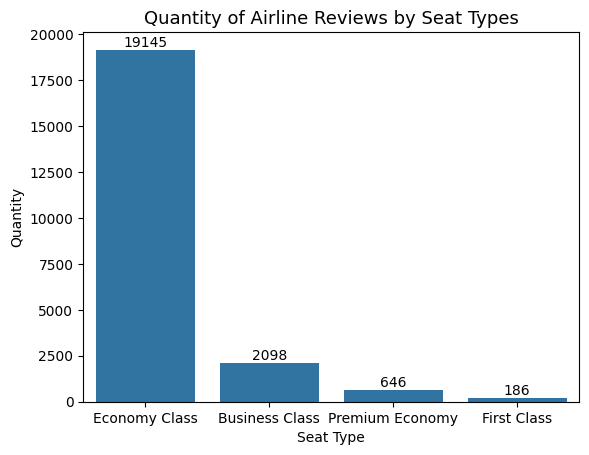

In [ ]:
dfg = df['Seat Type'].value_counts().reset_index()
dfg.columns = ['Seat Type', 'Quantity']

ax = sns.barplot(data=dfg, x='Seat Type', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 400),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Quantity of Airline Reviews by Seat Types', fontsize=13)
plt.show()

Chúng ta có thể thấy rằng Ecomony Class là loại ghế thường xuyên được quan sát thấy trong tập dữ liệu đánh giá. Do đó, chúng ta có thể thay thế NaN bằng 'Ecomony Class'.

In [ ]:
df['Seat Type'] = df['Seat Type'].fillna('Economy Class')

### Về thuộc tính thời gian

In [ ]:
df['review_datetime'] = pd.to_datetime(df['Review Date'], format='mixed')
df['flight_datetime'] = pd.to_datetime(df['Date Flown'])

In [ ]:
df['flight_review_date_diff'] = df.apply(lambda x: (x['review_datetime'] - x['flight_datetime']).days, axis=1)

Sau khi nhận được các giá trị của `flight_review_date_diff`, chúng ta có thể hiểu thêm vào chất lượng của dữ liệu đầu vào trong thuộc tính `Date Flown` để xem:
- Liệu chúng ta có thể sử dụng nó trong EDA không.
- Liệu chúng ta có thể quy kết các giá trị còn thiếu cho nó với thông tin từ `Review Date` hay không.

Chúng ta có thể biết được những điều sau đây:
- `Review Date` phải là quá khứ so với `Date Flown` (vì thông thường hành khách viết đánh giá sau khi chuyến bay hoàn thành).
- Chúng ta chỉ xem xét những bài đánh giá có `Review Date` cách `Date Flown` tối đa là 1 tháng vì ít có khách hàng nào thực hiện đánh giá sau khi bay tận 1 tháng.

In [ ]:
deviants = df[df['flight_review_date_diff'] < 0]
print("Số lượng bản ghi có lỗi nhập vào Date Flown:", deviants.shape[0])

Số lượng bản ghi có lỗi nhập vào Date Flown: 7


In [ ]:
deviants = df[df['flight_review_date_diff'] > 30]
print("Số lượng bản ghi có Review Date trong tương lai xa so với Date Flown:", deviants.shape[0])

Số lượng bản ghi có Review Date trong tương lai xa so với Date Flown: 5733


Như đã khám phá ở trên, chúng ta có thể hiểu thêm về dữ liệu trong cột `Date Flown`:
- 16,2% số bản ghi trong tập dữ liệu gốc bị thiếu giá trị.
- Trong số 19417 bản ghi có dữ liệu nhập vào `Date Flown`, chúng ta thấy 5733 bản ghi (29,53% bản ghi có giá trị) trong đó `Review Date` sau `Date Flown` hơn một tháng.
- Trong số 19417 bản ghi có dữ liệu được nhập vào `Date Flown`, chúng ta đã xác định được 7 bản ghi có vấn đề nhập dữ liệu.

Dựa trên những hiểu biết ở trên, chúng ta không đủ khả năng để quy các giá trị còn thiếu cho `Date Flown` với các giá trị từ `Review Date`.

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Review Date', 'Date Flown', 'flight_datetime', 'flight_review_date_diff'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline Name            23171 non-null  object        
 1   Overall_Rating          23171 non-null  int64         
 2   Review_Title            23171 non-null  object        
 3   Verified                23171 non-null  bool          
 4   Review                  23171 non-null  object        
 5   Aircraft                7129 non-null   object        
 6   Type Of Traveller       19433 non-null  object        
 7   Seat Type               23171 non-null  object        
 8   Route                   19343 non-null  object        
 9   Seat Comfort            19016 non-null  float64       
 10  Cabin Staff Service     18911 non-null  float64       
 11  Food & Beverages        14500 non-null  float64       
 12  Ground Service          18378 non-null  float6

## EDA - Phân tích Khám phá Dữ liệu

### Phân tích đơn biến

#### Overall Rating

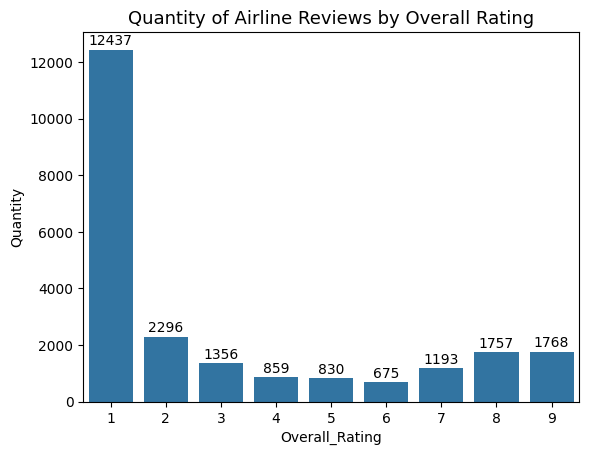

In [ ]:
dfg = df['Overall_Rating'].value_counts().reset_index()
dfg.columns = ['Overall_Rating', 'Quantity']

ax = sns.barplot(data=dfg, x='Overall_Rating', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 300),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Quantity of Airline Reviews by Overall Rating', fontsize=13)
plt.show()

In [ ]:
df_agg = df.groupby("Overall_Rating").mean(numeric_only=True).reset_index()
df_agg

,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,1,0.574415,2.191696,2.347275,2.210402,1.851778,1.930590,1.589404,1.807831
1,2,0.560540,2.081395,2.284395,1.812698,1.583208,1.703493,1.482804,1.656359
2,3,0.526549,2.411715,2.666383,1.995807,2.040431,1.980822,1.679587,2.062684
3,4,0.448196,2.550376,2.837594,2.174863,2.386838,2.021951,1.728261,2.412107
4,5,0.377108,2.785150,3.189873,2.455210,2.784029,2.195704,1.960265,3.001205
5,6,0.468148,3.076531,3.425170,2.848907,3.214015,2.438889,2.250000,3.518519
6,7,0.453479,3.487619,3.892381,3.160521,3.609323,2.589905,2.506410,3.849120
7,8,0.434832,3.853723,4.335548,3.657295,4.056967,2.871379,2.832000,4.163916
8,9,0.485294,4.206919,4.672977,4.134373,4.421206,3.440044,3.531250,4.453620


Chúng ta thấy rằng:
- Nhiều bài đánh giá nhất giữ `Overall_Rating` bằng 1, với 2 là điểm đánh giá phổ biến thứ hai.
- 9 và 8 lần lượt chiếm vị trí thứ ba và thứ tư về số lượng xếp hạng.
- Ít hơn 75% số đánh giá có `Overall_Rating` lớn hơn 5.
- Các bài đánh giá có `Overall_Rating` thấp có tỷ lệ đánh giá được xác minh (`Verified`) lớn hơn so với các bài đánh giá có `Overall_Rating` là 8-9.
- Chúng ta có thể thấy sự khác biệt có ý nghĩa thống kê trong việc phân bổ các biến số theo danh mục `Overall_Rating`, do đó, sẽ hợp lý hơn khi tìm hiểu chi tiết hơn về các bài đánh giá được xếp hạng thấp và xếp hạng cao.

#### Seat Type

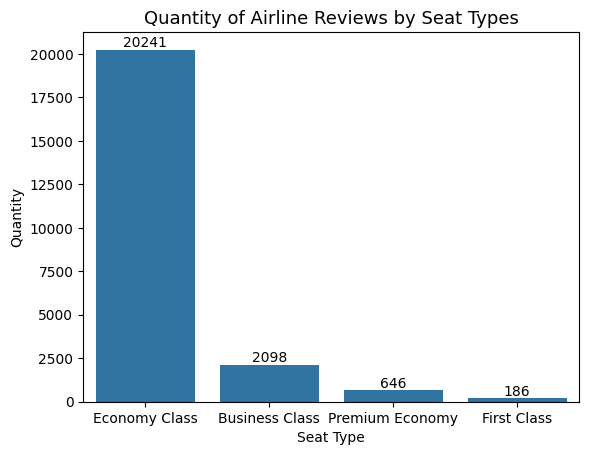

In [ ]:
dfg = df['Seat Type'].value_counts().reset_index()
dfg.columns = ['Seat Type', 'Quantity']

ax = sns.barplot(data=dfg, x='Seat Type', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 400),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Quantity of Airline Reviews by Seat Types', fontsize=13)
plt.show()

In [ ]:
df_agg = df.groupby("Seat Type").mean(numeric_only=True).reset_index()
df_agg

,Seat Type,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,Business Class,4.292183,0.596282,3.356250,3.613340,3.208696,3.041196,2.849759,2.500785,3.109152
1,Economy Class,2.934736,0.522603,2.517023,2.772057,2.440982,2.263052,2.047894,1.655026,2.324984
2,First Class,3.833333,0.591398,3.494318,3.755682,3.213415,3.212121,2.606838,2.721519,3.241935
3,Premium Economy,2.990712,0.592879,2.749596,2.925687,2.619048,2.481667,2.494172,2.132000,2.504644


Chúng ta có thể thấy rằng:
- Hạng phổ thông được đánh giá nhiều nhất (20241 đánh giá).
- Hạng Thương gia chiếm vị trí thứ 2 (2098 lượt đánh giá).
- Có sự khác biệt đáng kể trong việc phân bổ các đặc điểm số theo quan sát với các loại Loại chỗ ngồi khác nhau.


####Type of Traveller

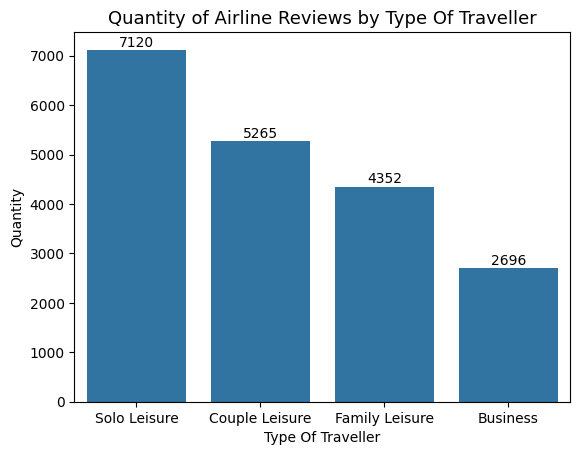

In [ ]:
dfg = df['Type Of Traveller'].value_counts().reset_index()
dfg.columns = ['Type Of Traveller', 'Quantity']

ax = sns.barplot(data=dfg, x='Type Of Traveller', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 150),
                ha='center', va='center', fontsize=10, color='black')

plt.title('Quantity of Airline Reviews by Type Of Traveller', fontsize=13)
plt.show()

In [ ]:
df_agg = df.groupby('Type Of Traveller').mean(numeric_only=True).reset_index()
df_agg

,Type Of Traveller,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,Business,3.119065,0.664688,2.657968,2.918951,2.566650,2.365237,2.296784,1.851628,2.389837
1,Couple Leisure,2.743210,0.594872,2.474690,2.758402,2.444189,2.253277,2.188259,1.707193,2.274074
2,Family Leisure,2.556985,0.587546,2.478026,2.705776,2.442361,2.218842,2.263556,1.762129,2.229779
3,Solo Leisure,3.107163,0.679775,2.728669,2.996102,2.715451,2.505576,2.383752,1.821218,2.521067


Chúng ta thấy rằng:
- Loại khách du lịch có một phần đáng kể các giá trị bị thiếu.
- Phần đánh giá lớn nhất đến từ khách du lịch Giải trí một mình (Solo Leisure) (7120 đánh giá).
- Couple Leisure chiếm vị trí thứ 2 (5265 lượt đánh giá).
- Có sự khác biệt đáng kể trong việc phân bổ các đặc điểm số theo quan sát giữa các Loại khách du lịch khác nhau.

#### Recommended

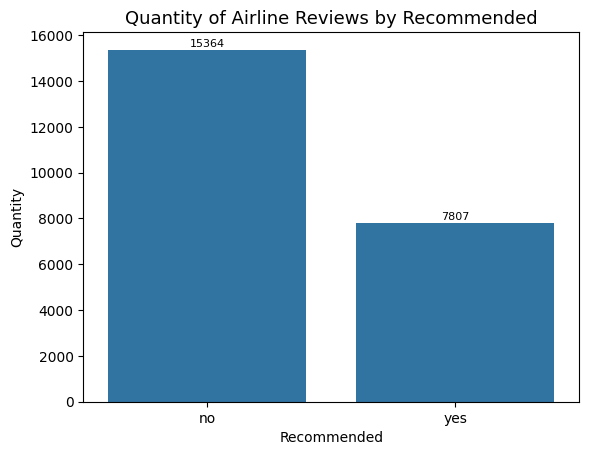

In [ ]:
dfg = df['Recommended'].value_counts().reset_index()
dfg.columns = ['Recommended', 'Quantity']

ax = sns.barplot(data=dfg, x='Recommended', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 250),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Quantity of Airline Reviews by Recommended', fontsize=13)
plt.show()

In [ ]:
df_agg = df.groupby('Recommended').mean(numeric_only=True).reset_index()
df_agg

,Recommended,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,no,1.720581,0.557863,1.840089,2.004811,1.656713,1.456827,1.578194,1.314367,1.468172
1,yes,5.714999,0.480466,3.999708,4.396061,3.850852,4.173727,3.210183,3.384096,4.258614


Chúng ta thấy rằng:
- Phần lớn các đánh giá được gửi với `Recommended` = 'no' (15364 trên 23171 đánh giá trong tập dữ liệu, hoặc 66,31% toàn bộ tập dữ liệu); nó cho thấy phần lớn người đánh giá không hài lòng với các dịch vụ do các hãng hàng không cung cấp.
- Có sự khác biệt đáng kể trong việc phân bổ đặc điểm số theo quan sát với các hạng mục trạng thái Khuyến nghị khác nhau (thứ hạng số cho từng dịch vụ sẽ cao hơn đối với các đánh giá có `Recommended` = 'yes').
- Tỷ lệ đánh giá được xác minh cao hơn đối với những đánh giá có `Recommended` = 'no'.

#### Verified

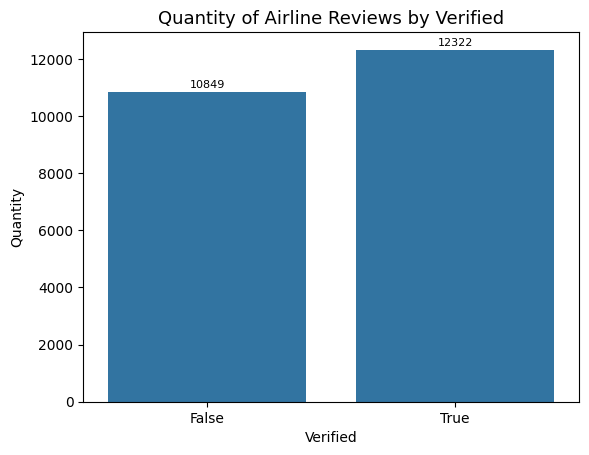

In [ ]:
dfg = df['Verified'].value_counts().reset_index()
dfg.columns = ['Verified', 'Quantity']

ax = sns.barplot(data=dfg, x='Verified', y='Quantity')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height() + 250),
                ha='center', va='center', fontsize=8, color='black')

plt.title('Quantity of Airline Reviews by Verified', fontsize=13)
plt.show()

In [ ]:
df_agg = df.groupby('Verified').mean(numeric_only=True).reset_index()
df_agg

,Verified,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,False,3.370818,2.636926,2.888720,2.531932,2.376441,1.962347,1.722967,2.485943
1,True,2.798409,2.605121,2.859311,2.570345,2.340510,2.348642,1.811749,2.340042


Chúng ta thấy rằng:
- Phần lớn các đánh giá trong tập dữ liệu đã được xác minh (cụ thể là 12322 trên 23171 đánh giá hoặc 53,18% số bản ghi trong tập dữ liệu).
- Có sự khác biệt đáng kể trong việc phân bổ các đặc điểm số theo quan sát với các danh mục trạng thái Đã xác minh khác nhau.

#### Aircraft

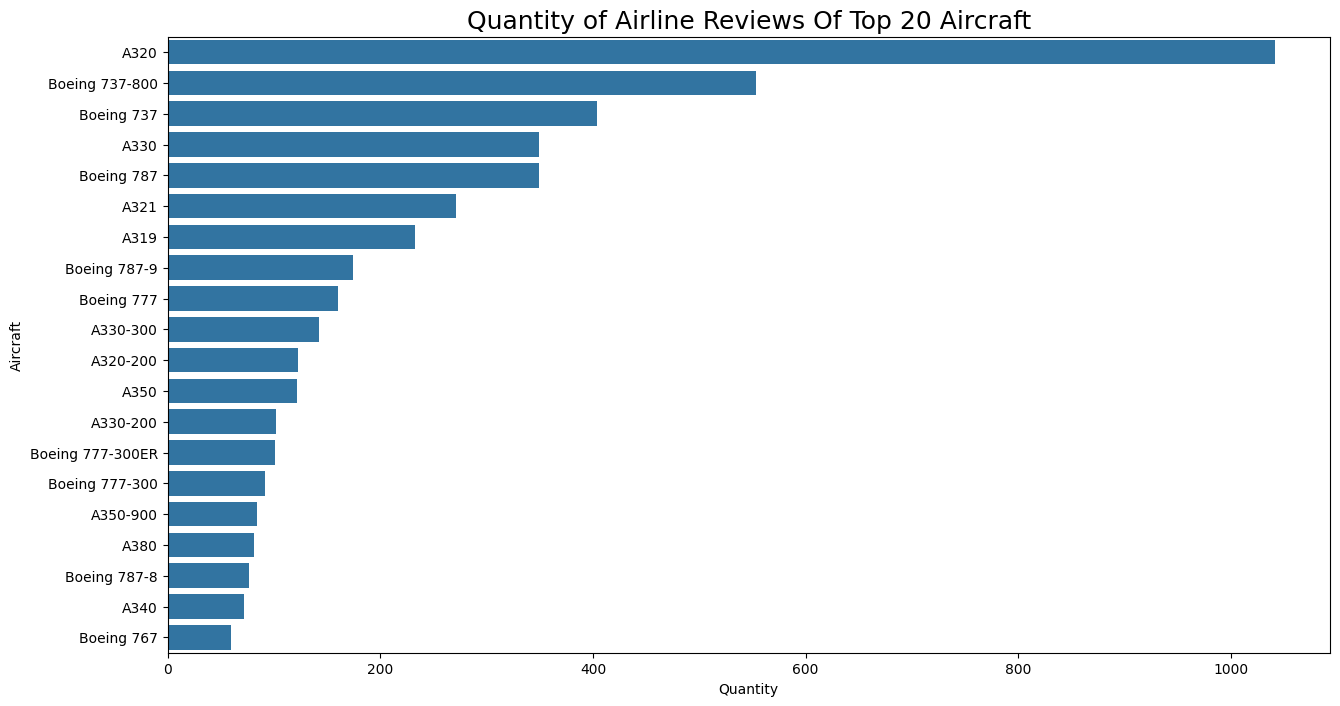

In [ ]:
dfg = df['Aircraft'].value_counts().reset_index().head(20)
dfg.columns = ['Aircraft', 'Quantity']

plt.figure(figsize=(15,8))
ax = sns.barplot(data=dfg, x='Quantity', y='Aircraft', orient='h')
plt.title('Quantity of Airline Reviews Of Top 20 Aircraft', fontsize=18)
plt.show()

Logic chung của ngành Hàng không cho biết không có cách nào hành khách có thể chọn máy bay một khi họ quyết định bay với một công ty nhất định trên một tuyến đường nhất định. Thông thường, các công ty hàng không quyết định máy bay nào sẽ phục vụ một chuyến bay cụ thể.

Theo bằng chứng đã đề cập ở trên, chúng ta sẽ không sử dụng thuộc tính `Aircraft` trong việc khai thác dữ liệu và EDA.

#### Airline

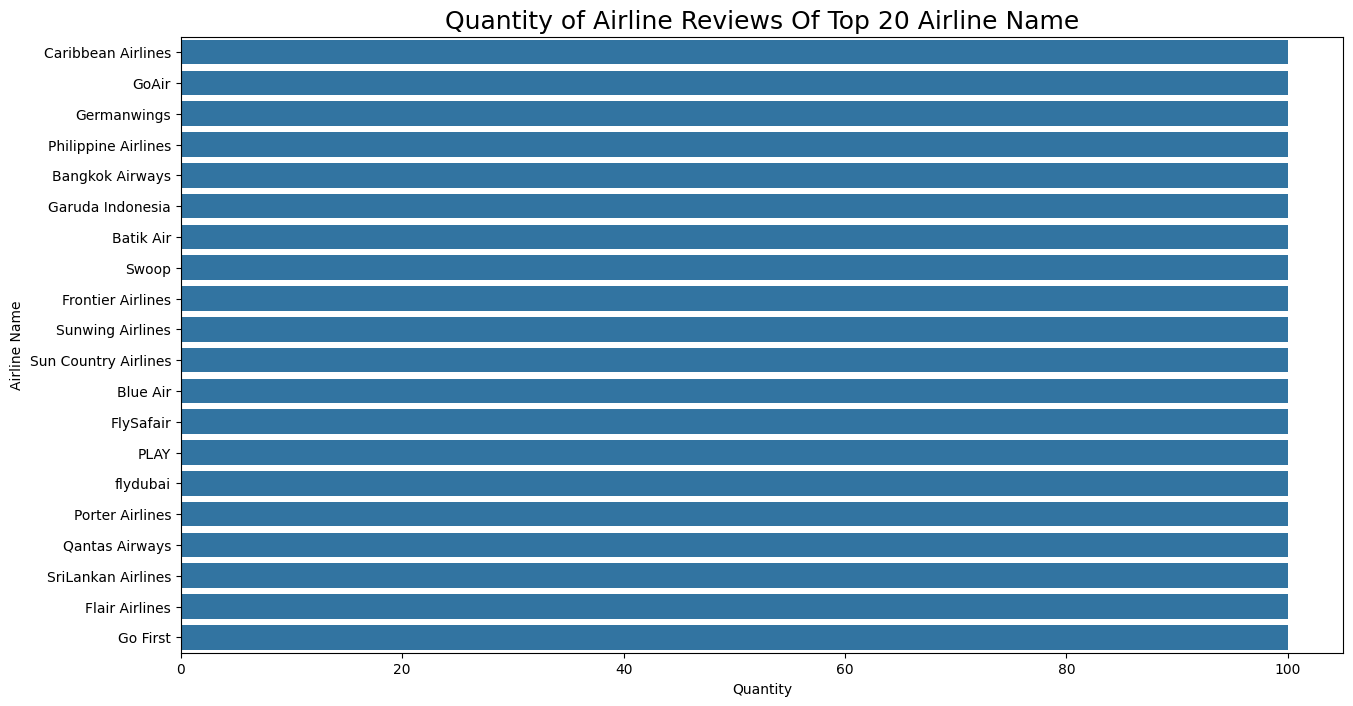

In [ ]:
dfg = df['Airline Name'].value_counts().reset_index().head(20)
dfg.columns = ['Airline Name', 'Quantity']

plt.figure(figsize=(15,8))
ax = sns.barplot(data=dfg, x='Quantity', y='Airline Name', orient='h')
plt.title('Quantity of Airline Reviews Of Top 20 Airline Name', fontsize=18)
plt.show()

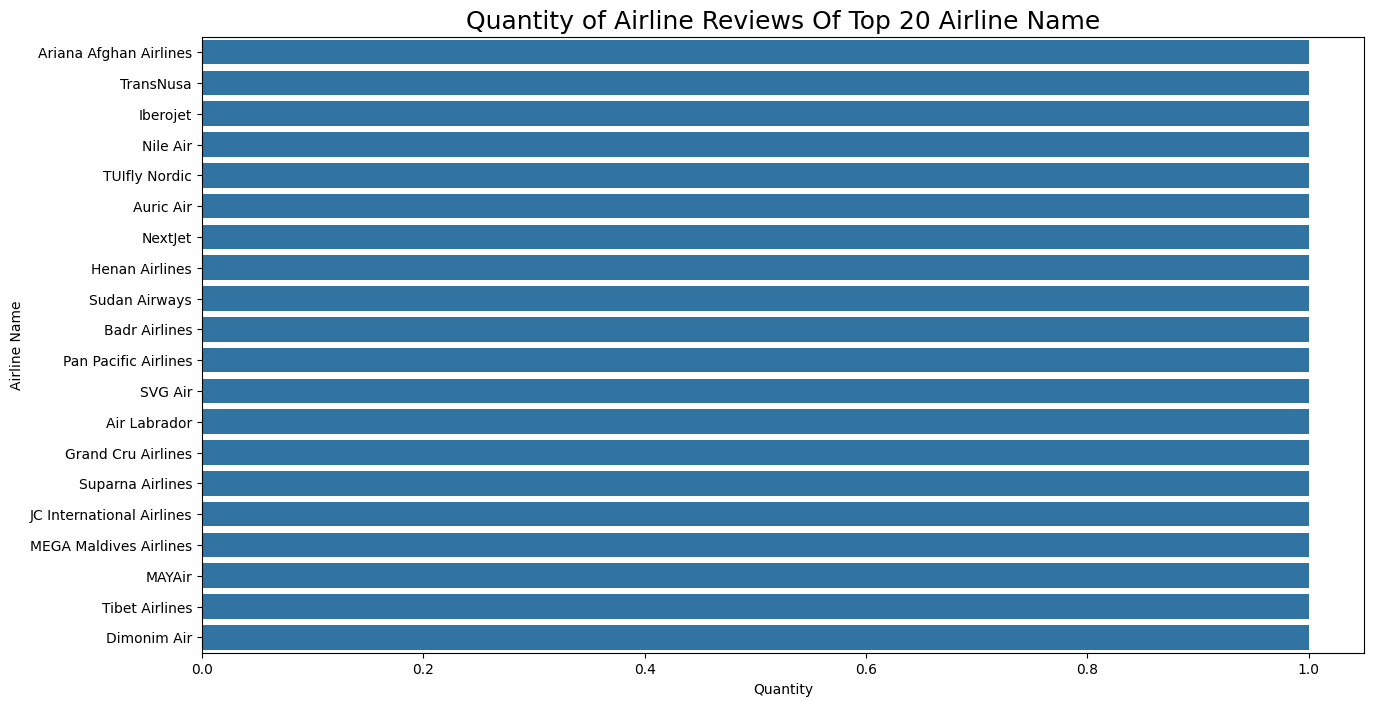

In [ ]:
dfg = df['Airline Name'].value_counts().reset_index().tail(20)
dfg.columns = ['Airline Name', 'Quantity']

plt.figure(figsize=(15,8))
ax = sns.barplot(data=dfg, x='Quantity', y='Airline Name', orient='h')
plt.title('Quantity of Airline Reviews Of Top 20 Airline Name', fontsize=18)
plt.show()

In [ ]:
len(df['Airline Name'].unique())

497

Chúng ta thấy rằng:
- Có các đánh giá về 497 hãng hàng không khác nhau được trình bày trong tập dữ liệu.
- Giá trị đánh giá tối đa cho mỗi hãng hàng không là 100 (và nó được hiển thị cho 155 hãng hàng không trong tập dữ liệu).
- 210 hãng hàng không có ít hơn 20 đánh giá cho mỗi công ty trong tập dữ liệu; những hãng hàng không như vậy không có mẫu đánh giá mang tính đại diện để đủ điều kiện cho các nghiên cứu chuyên sâu về hãng hàng không riêng lẻ.

In [ ]:
df_agg = df.groupby("Airline Name").mean(numeric_only=True).reset_index()
df_agg

,Airline Name,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,AB Aviation,3.666667,1.000000,2.666667,2.666667,2.000000,2.000000,NaN,NaN,2.333333
1,ANA All Nippon Airways,3.750000,0.840000,4.281250,4.604167,4.177778,4.193878,3.988235,4.125000,4.110000
2,ASKY Airlines,2.304348,0.391304,2.142857,1.857143,1.941176,1.555556,1.090909,1.000000,1.565217
3,ATA Airlines,1.500000,0.000000,1.000000,1.500000,1.500000,1.500000,NaN,NaN,2.000000
4,Adria Airways,4.087912,0.131868,3.392857,3.428571,2.627907,3.051282,1.718750,1.900000,2.538462
...,...,...,...,...,...,...,...,...,...,...
492,euroAtlantic Airways,2.062500,0.562500,1.375000,1.875000,2.307692,1.625000,1.538462,1.666667,1.437500
493,fastjet,2.878788,0.363636,3.000000,2.928571,2.125000,2.290323,1.285714,1.000000,2.272727
494,flyadeal,1.894737,0.842105,1.600000,1.666667,1.857143,1.333333,1.000000,1.000000,1.736842
495,flybe,1.250000,1.000000,3.333333,4.333333,4.500000,3.500000,NaN,NaN,3.250000


In [ ]:
dfg = df['Airline Name'].value_counts().reset_index()
dfg.columns = ['Airline Name', 'Review_Count']


df_summ = pd.merge(
    dfg,
    df_agg,
    how="inner",
    on='Airline Name')
df_summ.head()

,Airline Name,Review_Count,Overall_Rating,Verified,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
0,Caribbean Airlines,100,3.48,0.27,2.884058,3.173913,2.936508,2.510204,2.157895,1.823529,2.53
1,GoAir,100,1.42,0.71,1.735849,1.962264,1.678571,1.500000,1.190476,1.055556,1.37
2,Germanwings,100,4.21,0.02,3.185567,2.958763,1.977778,2.666667,0.657895,1.000000,3.08
3,Philippine Airlines,100,2.65,0.78,2.382022,3.056818,2.493827,1.957447,2.253521,1.540000,2.08
4,Bangkok Airways,100,4.45,0.82,3.673684,4.105263,3.839080,3.711340,2.157895,1.857143,3.64


<Axes: xlabel='Value For Money', ylabel='Overall_Rating'>

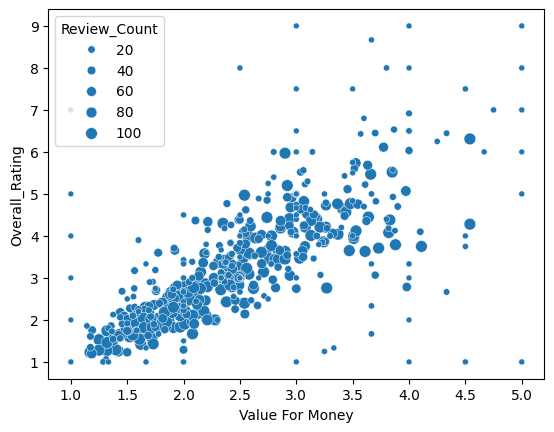

In [ ]:
sns.scatterplot(data=df_summ, x='Value For Money', y='Overall_Rating', size='Review_Count')

Chúng ta thấy rằng:
- Có mối quan hệ tuyến tính giữa `Overall_Rating` và `Value For Money` (VFM) (trước đó, chúng tôi đã xác định các thuộc tính này có mối tương quan từ trung bình đến mạnh).
- Có một số hãng hàng không 'ngoại lệ' có VFM và/hoặc `Overall_Rating` đặc biệt cao nhưng không có mẫu đánh giá có ý nghĩa thống kê (với số lượng đánh giá dưới 20).
- Đồng thời, chúng ta có thể thấy một số công ty có số lượng đánh giá đáng kể về mặt thống kê với `Overall_Rating` và/hoặc VFM trung bình tốt (như China Southern Airlines...).

Chúng ta sẽ hiểu sâu hơn bằng cách tổng hợp top 10 hãng hàng không hàng đầu và top 10 cuối cùng xét về `Overall_Rating` cao nhất/thấp nhất và/hoặc VFM. Trong khi lựa chọn các hãng hàng không, chúng ta sẽ lọc ra các công ty có số lượng đánh giá nhỏ về mặt thống kê (nghĩa là dưới 20).

In [ ]:
airlines_significant_df = df_summ[df_summ['Review_Count'] >= 20]
airlines_significant_df.sort_values(['Overall_Rating', 'Review_Count'],
                   ascending=False)[
                        [
                          'Airline Name',
                          'Overall_Rating',
                          'Review_Count'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Airline Name,Overall_Rating,Review_Count
282,Druk Air,6.450000,20
80,China Southern Airlines,6.310000,100
191,Cathay Dragon,6.112903,62
251,Mahan Air,6.033333,30
72,QantasLink,5.970000,100
178,Lao Airlines,5.736111,72
193,Citilink,5.683333,60
247,Nepal Airlines,5.606061,33
48,Royal Brunei Airlines,5.520000,100
258,Myanmar Airways,5.518519,27


Chúng ta thấy các hãng hàng không ở trên là danh sách top 10 công ty có giá trị `Overall_Rating` trung bình cao nhất:
- Druk Air (trung bình Tổng thể_Review = 6,450000 dựa trên 20 đánh giá).
- China Southern Airlines (trung bình Tổng thể_Review = 6,310000 dựa trên 100 đánh giá).
- Cathay Dragon (trung bình Tổng thể_Review = 6,112903 dựa trên 62 đánh giá).
- QantasLink (trung bình Tổng thể_Review = 5,970000 dựa trên 100 đánh giá).
- Lao Airlines (trung bình Tổng thể_Review = 5,736111 dựa trên 72 đánh giá).
- Citilink (trung bình Tổng thể_Review = 5,683333 dựa trên 60 đánh giá).
- Nepal Airlines (trung bình Tổng thể_Review = 5,606061 dựa trên 33 đánh giá).
- Royal Brunei Airlines (trung bình Tổng thể_Review = 5,520000 dựa trên 100 đánh giá).
- Myanmar Airways (trung bình Tổng thể_Review = 5,518519 dựa trên 27 đánh giá).

In [ ]:
airlines_significant_df.sort_values(['Overall_Rating', 'Review_Count'],
                   ascending=True)[
                        [
                          'Airline Name',
                          'Overall_Rating',
                          'Review_Count'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Airline Name,Overall_Rating,Review_Count
182,Viva Air,1.200000,70
215,VivaColombia,1.229167,48
8,Frontier Airlines,1.230000,100
63,Spirit Airlines,1.260000,100
104,Volaris,1.270000,100
123,Interjet,1.280000,100
239,Boutique Air,1.289474,38
77,Silver Airways,1.290000,100
272,Air Juan,1.347826,23
1,GoAir,1.420000,100


Chúng ta thấy các hãng hàng không ở trên nằm trong danh sách 10 hãng hàng không đứng cuối xét về giá trị `Overall_Rating` trung bình thấp nhất:
- Viva Air (trung bình Tổng thể_Review = 1,200000 dựa trên 70 lượt đánh giá).
- VivaColombia (trung bình Tổng thể_Review = 1,229167 dựa trên 48 lượt đánh giá).
- Frontier Airlines (trung bình Tổng thể_Review = 1,230000 dựa trên 100 lượt đánh giá).
- Spirit Airlines (trung bình Tổng thể_Review = 1,260000 dựa trên 100 lượt đánh giá).
- Volaris (trung bình Tổng thể_Review = 1,270000 dựa trên 100 lượt xem lại).
- Interjet (trung bình Tổng thể_Review = 1,280000 dựa trên 100 lượt xem lại).
- Boutique Air (trung bình Tổng thể_Review = 1,289474 dựa trên 38 lượt đánh giá).
- Silver Airways (trung bình Tổng thể_Review = 1,290000 dựa trên 100 lượt đánh giá).
- Air Juan (trung bình Tổng thể_Review = 1.347826 dựa trên 23 lượt xem lại).
- GoAir (trung bình Tổng thể_Review = 1,420000 dựa trên 100 lượt đánh giá).

In [ ]:
airlines_significant_df.sort_values(['Value For Money', 'Review_Count'],
                   ascending=False)[
                        [
                          'Airline Name',
                          'Value For Money',
                          'Review_Count'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Airline Name,Value For Money,Review_Count
36,Hainan Airlines,4.540000,100
80,China Southern Airlines,4.540000,100
83,ANA All Nippon Airways,4.110000,100
283,Air Busan,4.100000,20
251,Mahan Air,4.000000,30
207,Rex Airlines,3.980392,51
180,BA CityFlyer,3.972222,72
286,Jin Air,3.900000,20
5,Garuda Indonesia,3.880000,100
48,Royal Brunei Airlines,3.850000,100


Chúng ta thấy rằng 10 hãng hàng không hàng đầu về giá trị VFM trung bình cao nhất là:
- Hainan Airlines (VFM trung bình = 4,540000 dựa trên 100 đánh giá).
- China Southern Airlines (VFM trung bình = 4,540000 dựa trên 100 đánh giá).
- ANA All Nippon Airways (VFM trung bình = 4,110000 dựa trên 100 đánh giá).
- Air Busan (VFM trung bình = 4,100000 dựa trên 20 đánh giá).
- Mahan Air (VFM trung bình = 4,000000 dựa trên 30 đánh giá).
- Rex Airlines (VFM trung bình = 3,980392 dựa trên 51 đánh giá).
- BA CityFlyer (VFM trung bình = 3,972222 dựa trên 72 đánh giá).
- Jin Air (VFM trung bình = 3,900000 dựa trên 20 đánh giá).
- Garuda Indonesia (VFM trung bình = 3,880000 dựa trên 100 đánh giá).
- Royal Brunei Airlines (VFM trung bình = 3,850000 dựa trên 100 đánh giá).

Nó cũng chứng minh các hãng hàng không dưới đây nằm trong cả hai danh sách top 10 (theo tổng thể_Review và VFM tương ứng):
- Hãng hàng không Phương Nam Trung Quốc (China Southern).
- Hãng hàng không Mahan.
- Hãng hàng không Hoàng gia Brunei (Royal Brunei).

In [ ]:
airlines_significant_df.sort_values(['Value For Money', 'Review_Count'],
                   ascending=True)[
                        [
                          'Airline Name',
                          'Value For Money',
                          'Review_Count'
                        ]
][:10].style.background_gradient(cmap='seismic')

,Airline Name,Value For Money,Review_Count
8,Frontier Airlines,1.170000,100
272,Air Juan,1.173913,23
273,SyrianAir,1.173913,23
182,Viva Air,1.185714,70
242,TAME,1.189189,37
38,Avianca,1.250000,100
123,Interjet,1.250000,100
19,Go First,1.320000,100
104,Volaris,1.320000,100
141,Jetblue Airways,1.320000,100


Chúng ta thấy rằng 10 hãng hàng không có giá trị VFM trung bình thấp nhất là:
- Frontier Airlines (VFM trung bình = 1,170000 dựa trên 100 đánh giá).
- Air Juan (VFM trung bình = 1.173913 dựa trên 23 đánh giá).
- SyriaAir (VFM trung bình = 1,173913 dựa trên 23 đánh giá).
- Viva Air (VFM trung bình = 1,185714 dựa trên 70 đánh giá).
- TAME (VFM trung bình = 1,189189 dựa trên 37 đánh giá).
- Avianca (VFM trung bình = 1,250000 dựa trên 100 đánh giá).
- Interjet (VFM trung bình = 1,250000 dựa trên 100 đánh giá).
- Đi trước (VFM trung bình = 1,320000 dựa trên 100 đánh giá).
- Volaris (VFM trung bình = 1,320000 dựa trên 100 đánh giá).
- Jetblue Airways (VFM trung bình = 1,320000 dựa trên 100 đánh giá).

Chúng ta có thể kết luận thêm rằng các hãng hàng không sau nằm trong cả hai danh sách bên ngoài (theo tổng thể_Review và VFM tương ứng):
- Viva Air
- Frontier Airlines
- Volaris
- Interjet
- Air Juan

#### Date Review

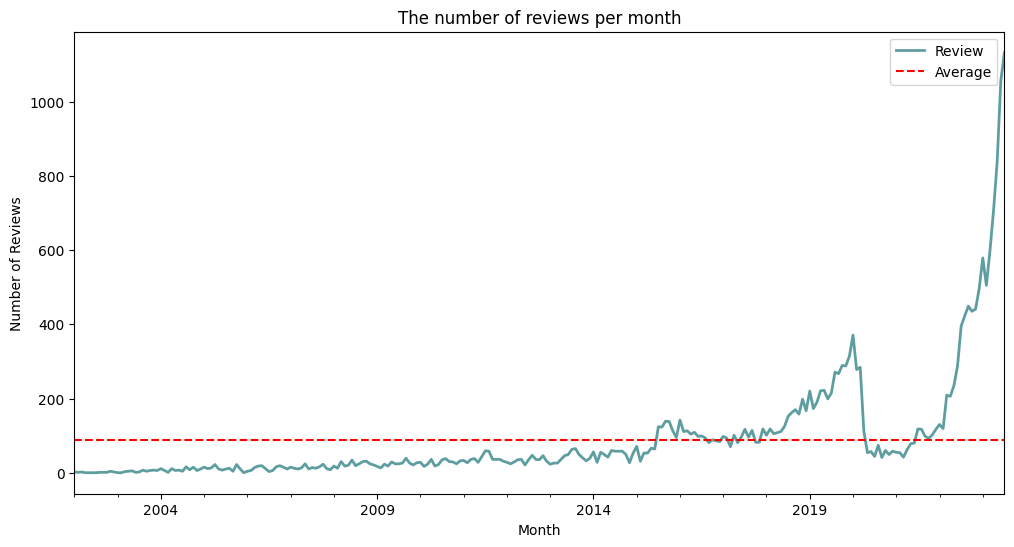

In [ ]:
monthly_reviews = df.resample('M', on='review_datetime').count()['Review']

plt.figure(figsize=(12, 6))
monthly_reviews.plot(linewidth=2, color='cadetblue')
plt.axhline(y=monthly_reviews.mean(), color='red', linestyle='--', label='Average')

plt.title('The number of reviews per month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

plt.legend()
plt.show()

In [ ]:
monthly_reviews.idxmax()

Timestamp('2023-07-31 00:00:00')

Số lượng đánh giá cho thấy xu hướng ngày càng tăng theo thời gian, mặc dù có một số khác biệt. Dường như có tính thời vụ tiềm ẩn khi chúng ta quan sát thấy một số mô hình nhất định lặp lại theo thời gian. Số lượng đánh giá đạt mức cao nhất vào tháng 7 năm 2023, cho thấy mức độ sử dụng dịch vụ hàng không tăng vọt hoặc có lẽ mức độ tương tác với việc gửi đánh giá đã tăng lên trong giai đoạn này.

Vào năm 2020, số lượng đánh giá đã giảm đáng kể, rất có thể là do hạn chế đi lại và việc sử dụng hãng hàng không giảm do đại dịch Covid-19. Sự suy giảm này đã đưa số lượng đánh giá xuống dưới mức trung bình, nhấn mạnh mức độ ảnh hưởng của đại dịch đối với việc di chuyển bằng đường hàng không.

Năm 2021 chứng kiến sự biến động mạnh mẽ về số lượng đánh giá, có thể phản ánh sự phục hồi không đồng đều của du lịch toàn cầu khi các quốc gia phải vật lộn với các giai đoạn khác nhau của đại dịch và thực hiện các chính sách du lịch khác nhau.

Vào năm 2022 và 2023, số lượng đánh giá gần như quay trở lại mức trước đại dịch, cho thấy sự phục hồi trong hoạt động du lịch hàng không và sự tham gia của hành khách trong việc gửi đánh giá. Tuy nhiên, nửa đầu năm 2023 lại chứng kiến lượng đánh giá giảm mạnh. Khi tập dữ liệu của chúng tôi kết thúc ở đây, sẽ cần có thêm dữ liệu và phân tích để hiểu đầy đủ lý do đằng sau sự sụt giảm đột ngột này.
#### Numeric Features

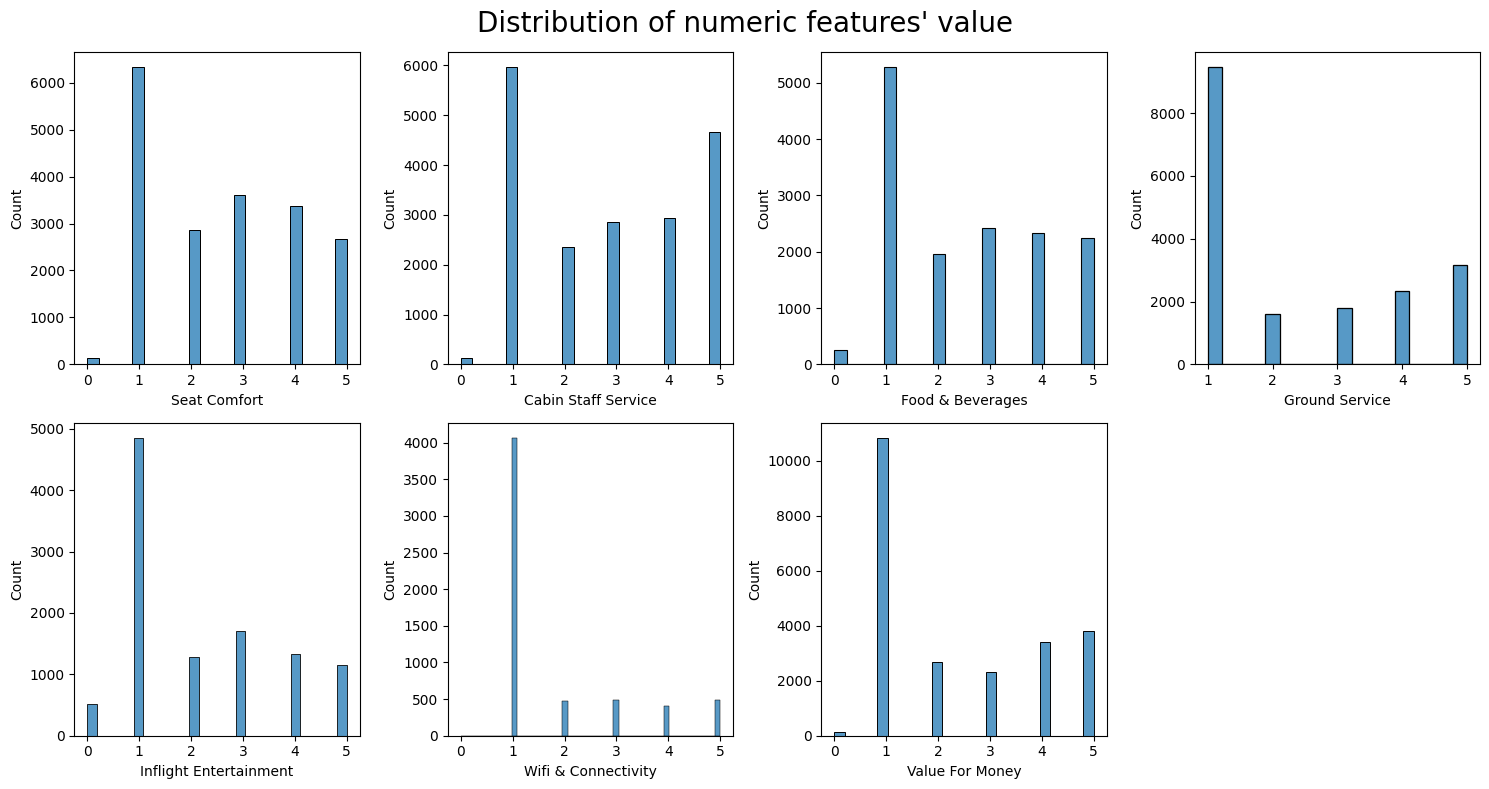

In [ ]:
plt.figure(figsize=(15, 8))
plt.suptitle('Distribution of numeric features\' value', fontsize=20)

plt.subplot(2, 4, 1)
sns.histplot(data=df, x='Seat Comfort')

plt.subplot(2, 4, 2)
sns.histplot(data=df, x='Cabin Staff Service')

plt.subplot(2, 4, 3)
sns.histplot(data=df, x='Food & Beverages')

plt.subplot(2, 4, 4)
sns.histplot(data=df, x='Ground Service')

plt.subplot(2, 4, 5)
sns.histplot(data=df, x='Inflight Entertainment')

plt.subplot(2, 4, 6)
sns.histplot(data=df, x='Wifi & Connectivity')

plt.subplot(2, 4, 7)
sns.histplot(data=df, x='Value For Money')

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Overall_Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,review_datetime
count,23171.000000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,23171.000000,23171
mean,3.066419,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.408355,2019-04-11 06:37:33.126753280
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2002-01-06 00:00:00
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017-01-14 12:00:00
50%,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2020-01-13 00:00:00
75%,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,2022-12-08 00:00:00
max,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2023-07-27 00:00:00
std,2.854981,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.578833,NaN


Số liệu thống kê tóm tắt về các tính năng số trong tập dữ liệu giúp chúng ta rút ra một vài thông tin:
- Giá trị trung bình của `Overall_Rating` trên toàn bộ tập hợp đánh giá là 3,1 (trên thang điểm 1 tới 9, nhỏ hơn giá trị giữa khoảng là 5; khá thấp, IMHO).
- 75% số bài đánh giá trong tập dữ liệu có `Overall_Rating` <=5 (một lần nữa, IMHO khá thấp).
- Giá trị `Overall_Rating` trung bình cho phần lớn các dịch vụ hàng không (`Seat Comfort`, `Cabin Staff Service`, `Food & Beverages`, `Ground Service`, `Value For Money`) là khoảng 2,5, giá trị trung bình cho thang xếp hạng của thuộc tính tương ứng).
- `Cabin Staff Service` và `Seat Comfort` có xếp hạng trung bình cao nhất trong các dịch vụ của từng hãng hàng không.
- Các dịch vụ chuyến bay liên quan đến giải trí và liên lạc (`Inflight Entertainment`, `Wifi & Connectivity`) có mức giá trung bình thấp hơn so với các dịch vụ nêu trên.
- 75% đánh giá có các giá trị `Seat Comfort`, `Cabin Staff Service`, `Food & Beverages`, `Ground Service`, `Value For Money` <= 4 (theo thang điểm 1..5).
- 75% đánh giá có giá trị `Inflight Entertainment` <= 3 (theo thang điểm 1 tới 5).
- 75% đánh giá có giá trị `Wifi & Connectivity`	<= 2 (theo thang điểm 1 tới 5).

### Phân tích đa biến

#### Seat Type và Type of Traveller

In [ ]:
df_group = df.groupby(['Seat Type', 'Type Of Traveller']).count()[['Review']]
df_group.reset_index(inplace=True)

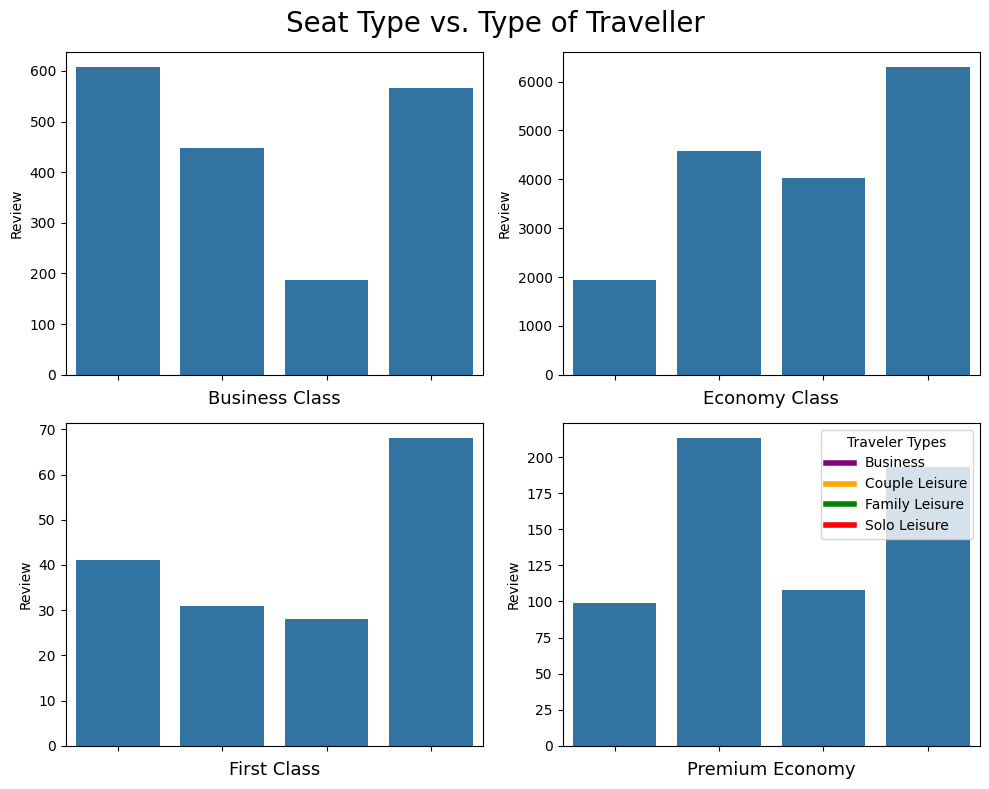

In [ ]:
plt.figure(figsize=(10, 8))
plt.suptitle('Seat Type vs. Type of Traveller', fontsize=20)
values = ['Business', 'Couple Leisure', 'Family Leisure', 'Solo Leisure']
color_map = {'Business': 'purple', 'Couple Leisure': 'orange', 'Family Leisure': 'green', 'Solo Leisure': 'red'}

plt.subplot(2, 2, 1)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Business Class'], x='Type Of Traveller', y='Review')
ax.set_xticklabels('')
plt.xlabel('Business Class', fontsize=13)

plt.subplot(2, 2, 2)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Economy Class'], x='Type Of Traveller', y='Review')
ax.set_xticklabels('')
plt.xlabel('Economy Class', fontsize=13)

plt.subplot(2, 2, 3)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'First Class'], x='Type Of Traveller', y='Review')
ax.set_xticklabels('')
plt.xlabel('First Class', fontsize=13)

plt.subplot(2, 2, 4)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Premium Economy'], x='Type Of Traveller', y='Review')
ax.set_xticklabels('')
plt.xlabel('Premium Economy', fontsize=13)


legend_labels = [plt.Line2D([0], [0], color=color_map[traveler], lw=4) for traveler in values]
plt.tight_layout()
plt.legend(legend_labels, values, title='Traveler Types', loc='upper right')
plt.show()

Ta thấy đa phần những người dùng vé hạng phổ thông (Economy) là những người đi cá nhân. Còn những người đi hạng phổ thông đặc biệt (Premium Economy) là những người đi theo cặp. Ta cũng thấy đa số những người đi công tác cũng lựa chọn đi hạng phổ thông (Economy) và phần lớn những người đi dạng Thương gia là những người đi dưới dạng công tác.

#### Recommended và Seat Type

In [ ]:
df_group = df.groupby(['Seat Type', 'Recommended']).count()[['Review']]
df_group.reset_index(inplace=True)

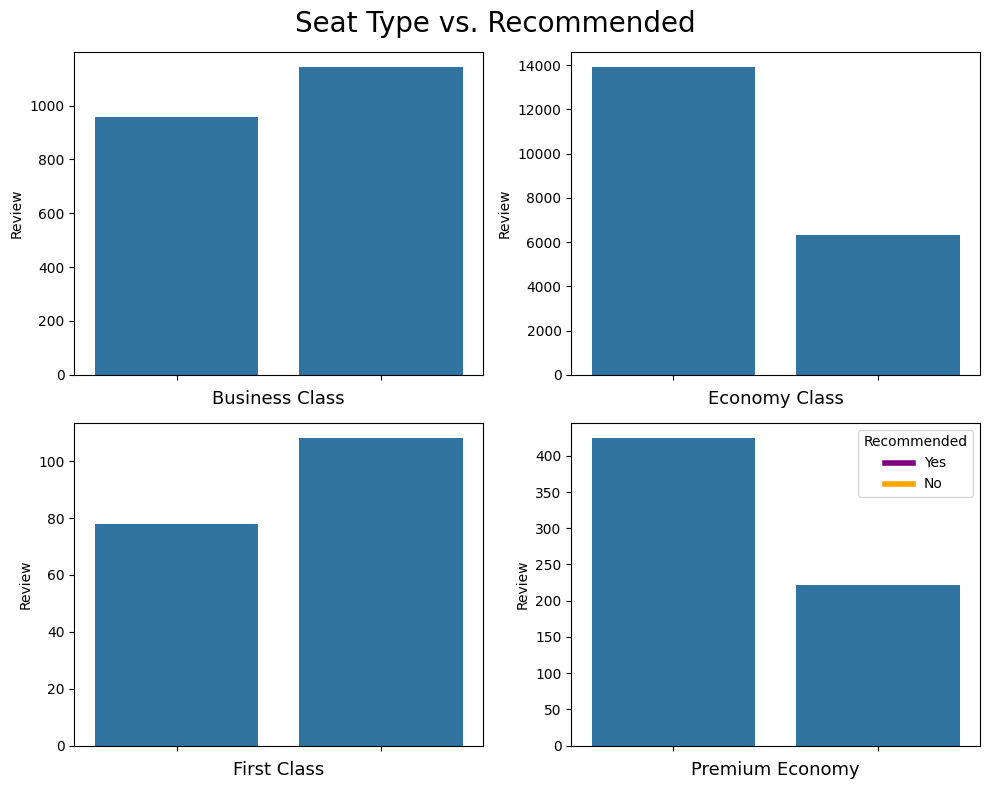

In [ ]:
plt.figure(figsize=(10, 8))
plt.suptitle('Seat Type vs. Recommended', fontsize=20)
values = ['Yes', 'No']
color_map = {'Yes':'purple', 'No':'orange'}

plt.subplot(2, 2, 1)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Business Class'], x='Recommended', y='Review')
ax.set_xticklabels('')
plt.xlabel('Business Class', fontsize=13)

plt.subplot(2, 2, 2)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Economy Class'], x='Recommended', y='Review')
ax.set_xticklabels('')
plt.xlabel('Economy Class', fontsize=13)

plt.subplot(2, 2, 3)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'First Class'], x='Recommended', y='Review')
ax.set_xticklabels('')
plt.xlabel('First Class', fontsize=13)

plt.subplot(2, 2, 4)
ax = sns.barplot(data=df_group[df_group['Seat Type'] == 'Premium Economy'], x='Recommended', y='Review')
ax.set_xticklabels('')
plt.xlabel('Premium Economy', fontsize=13)

legend_labels = [plt.Line2D([0], [0], color=color_map[traveler], lw=4) for traveler in values]
plt.tight_layout()
plt.legend(legend_labels, values, title='Recommended', loc='upper right')
plt.show()

Ta có thể thấy rằng đa số những người đi hạng Phổ thông (Economy và Premium Economy) sẽ giới thiệu hãng cho người khác. Xu hướng ngược lại có thể thấy ở những người dùng các hạng cao cấp hơn (Business và First Class).
## Lựa chọn thuộc tính

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Airline Name            23171 non-null  object        
 1   Overall_Rating          23171 non-null  int64         
 2   Review_Title            23171 non-null  object        
 3   Verified                23171 non-null  bool          
 4   Review                  23171 non-null  object        
 5   Aircraft                7129 non-null   object        
 6   Type Of Traveller       19433 non-null  object        
 7   Seat Type               23171 non-null  object        
 8   Route                   19343 non-null  object        
 9   Seat Comfort            19016 non-null  float64       
 10  Cabin Staff Service     18911 non-null  float64       
 11  Food & Beverages        14500 non-null  float64       
 12  Ground Service          18378 non-null  float6

In [ ]:
def ApplyType(x):
    if  x == 'Solo Leisure':
        return 0
    elif x == 'Couple Leisure':
        return 1
    elif x == 'Business':
        return 2
    else: return 3

def ApplySeat(x):
    if x == 'Economy Class':
        return 0
    elif x == 'Business Class':
        return 1
    elif x == 'Premium Economy':
        return 2
    else: return 3

def ApplyRecommended(x):
    if x == 'yes': return 1
    else: return 0

In [ ]:
df['Type Of Traveller'] = df['Type Of Traveller'].apply(ApplyType)
df['Seat Type'] = df['Seat Type'].apply(ApplySeat)
df['Recommended'] = df['Recommended'].apply(ApplyRecommended)

In [ ]:
df.rename(columns={'Type Of Traveller':'Type_Of_Traveller', 'Seat Type':'Seat_Type',
                  'Seat Comfort':'Seat_Comfort', 'Cabin Staff Service':'Cabin_Staff_Service',
                  'Food & Beverages':'Food_Beverages', 'Ground Service':'Ground_Service',
                  'Inflight Entertainment':'Inflight_Entertainment', 'Wifi & Connectivity':'Wifi_Connectivity',
                  'Value For Money':'Value_For_Money'}, inplace=True)

In [ ]:
continuous_variables = ['Overall_Rating', 'Seat_Comfort', 'Cabin_Staff_Service', 'Food_Beverages',
                        'Ground_Service', 'Inflight_Entertainment', 'Wifi_Connectivity', 'Value_For_Money']
categorical_variables = ['Verified', 'Type_Of_Traveller', 'Seat_Type', 'Recommended']

### Biến liên tục

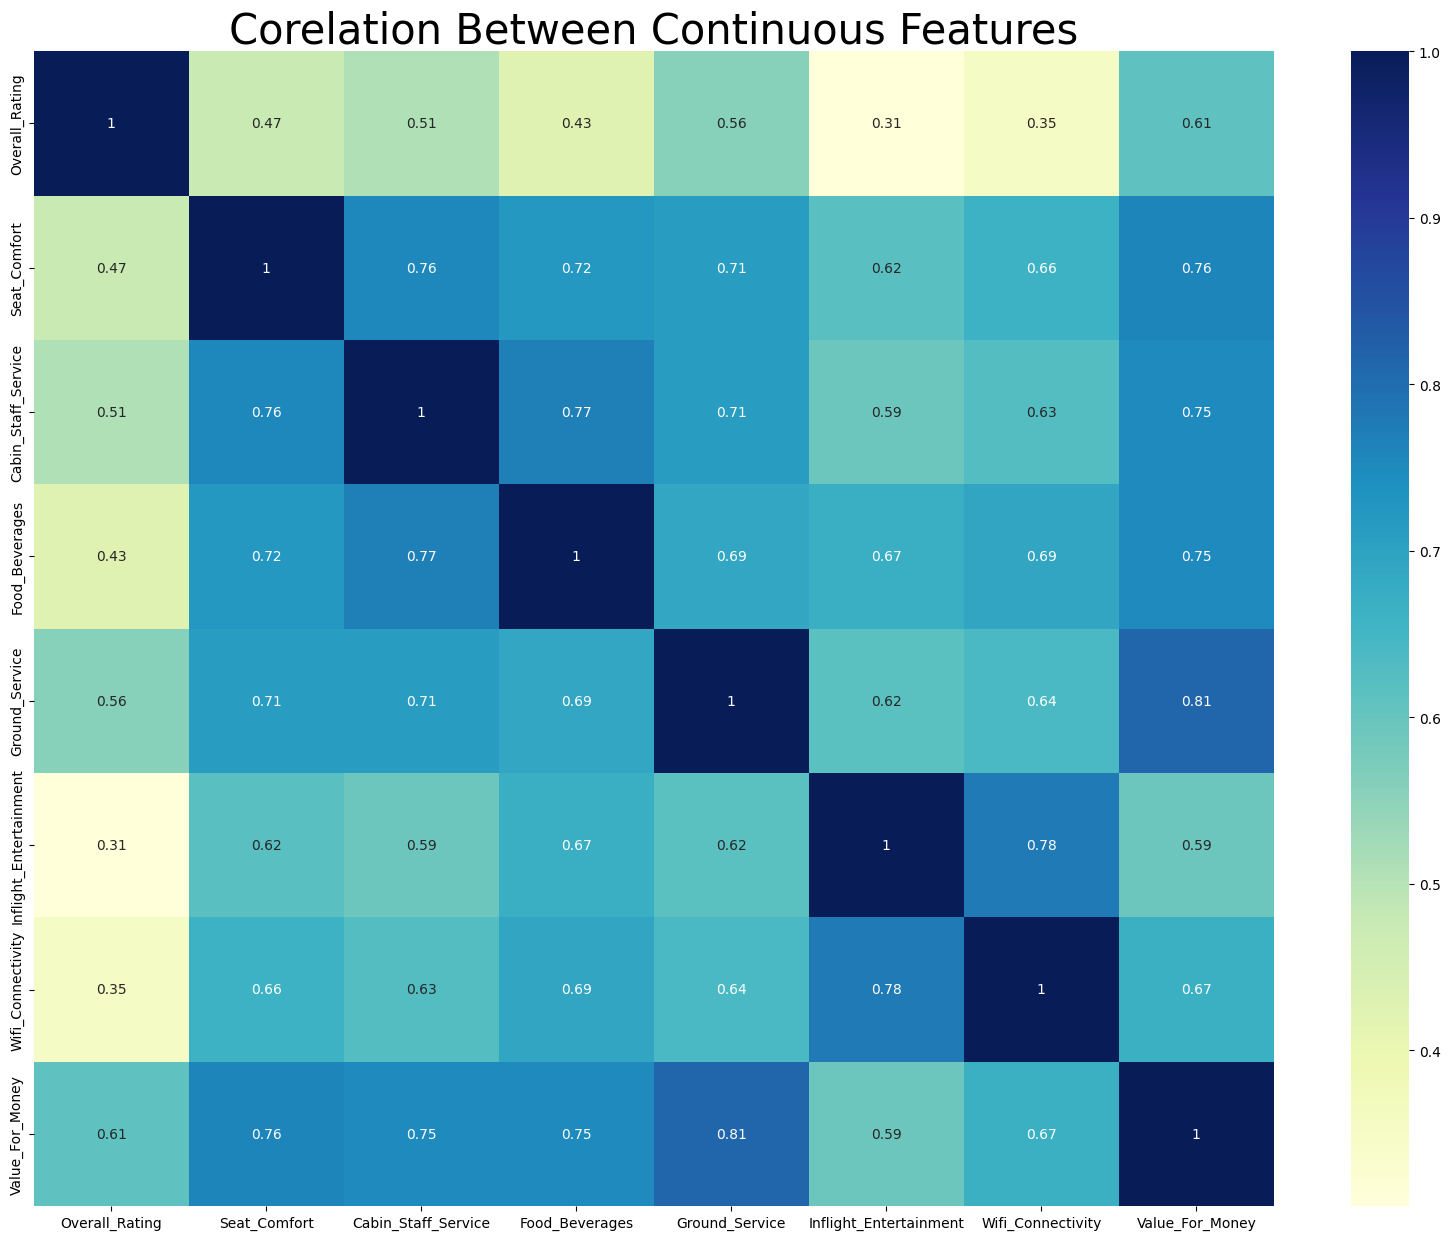

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df[continuous_variables].corr(method='pearson'), annot=True, cmap='YlGnBu')
plt.title('Corelation Between Continuous Features', fontsize=30)
plt.show()

### Biến phân loại

In [ ]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

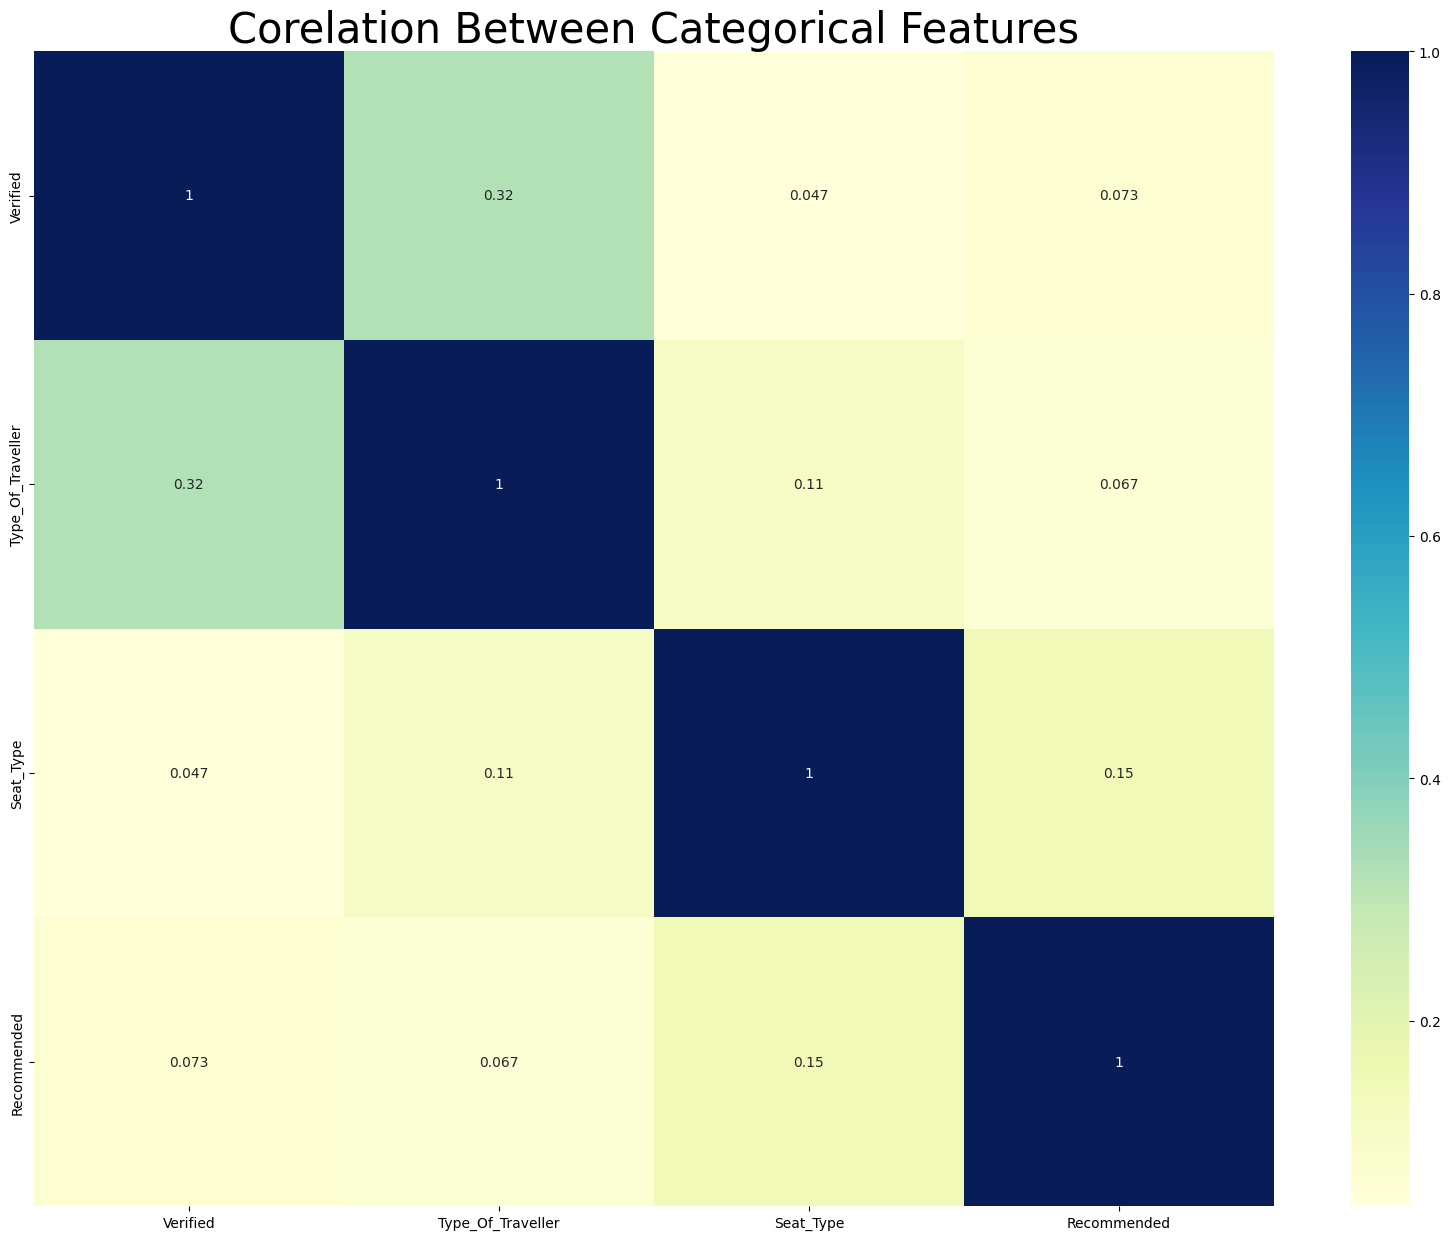

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df[categorical_variables].corr(method=lambda x, y: cramers_v(pd.crosstab(x,y).values)), annot=True, cmap='YlGnBu')
plt.title('Corelation Between Categorical Features', fontsize=30)
plt.show()

### Biến liên tục và biến phân loại

In [ ]:
coefficient_df = pd.DataFrame(columns=["categorical_variables","continuous_variables", "p-value","select_feature"])

for cate_var in categorical_variables:
    for conti_var in continuous_variables:
        model = ols(f'{conti_var} ~ C({cate_var})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        row = {"categorical_variables":cate_var,"continuous_variables":conti_var,"p-value":anova_table["PR(>F)"][0],"select_feature":anova_table["PR(>F)"][0]<=0.05}
        coefficient_df = coefficient_df._append(row, ignore_index = True)

coefficient_df

,categorical_variables,continuous_variables,p-value,select_feature
0,Verified,Overall_Rating,1.276167e-52,True
1,Verified,Seat_Comfort,1.399150e-01,False
2,Verified,Cabin_Staff_Service,2.138047e-01,False
3,Verified,Food_Beverages,1.328649e-01,False
4,Verified,Ground_Service,1.409609e-01,False
5,Verified,Inflight_Entertainment,2.903768e-41,True
6,Verified,Wifi_Connectivity,1.329305e-02,True
7,Verified,Value_For_Money,2.176521e-12,True
8,Type_Of_Traveller,Overall_Rating,2.395718e-20,True
9,Type_Of_Traveller,Seat_Comfort,1.742975e-18,True


In [ ]:
df.drop(columns=['Verified', 'Route', 'Review_Title', 'Airline Name', 'Aircraft'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Overall_Rating          23171 non-null  int64         
 1   Review                  23171 non-null  object        
 2   Type_Of_Traveller       23171 non-null  int64         
 3   Seat_Type               23171 non-null  int64         
 4   Seat_Comfort            19016 non-null  float64       
 5   Cabin_Staff_Service     18911 non-null  float64       
 6   Food_Beverages          14500 non-null  float64       
 7   Ground_Service          18378 non-null  float64       
 8   Inflight_Entertainment  10829 non-null  float64       
 9   Wifi_Connectivity       5920 non-null   float64       
 10  Value_For_Money         23171 non-null  float64       
 11  Recommended             23171 non-null  int64         
 12  review_datetime         23171 non-null  dateti

### Làm sạch một lần cuối

In [ ]:
df['Seat_Comfort'] = df['Seat_Comfort'].fillna(df['Seat_Comfort'].mode().iloc[0])
df['Cabin_Staff_Service'] = df['Cabin_Staff_Service'].fillna(df['Cabin_Staff_Service'].mode().iloc[0])
df['Ground_Service'] = df['Ground_Service'].fillna(df['Ground_Service'].mode().iloc[0])

df.drop(columns=['Wifi_Connectivity', 'Inflight_Entertainment', 'Food_Beverages'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Overall_Rating       23171 non-null  int64         
 1   Review               23171 non-null  object        
 2   Type_Of_Traveller    23171 non-null  int64         
 3   Seat_Type            23171 non-null  int64         
 4   Seat_Comfort         23171 non-null  float64       
 5   Cabin_Staff_Service  23171 non-null  float64       
 6   Ground_Service       23171 non-null  float64       
 7   Value_For_Money      23171 non-null  float64       
 8   Recommended          23171 non-null  int64         
 9   review_datetime      23171 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 1.8+ MB


## Mô hình hóa

### Xây dựng mô hình dự đoán chỉ số đánh giá

#### Chuẩn hóa dữ liệu

In [ ]:
df_model = df.copy().drop(columns=['Review', 'review_datetime'])

In [ ]:
X = df_model.drop(columns=['Overall_Rating'])
y = df_model['Overall_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Kích thước của X_train_scaled_data:', X_train_scaled.shape)
print('Kích thước của X_test_scaled:', X_test_scaled.shape)
print('Kích thước của y_train:', y_train.shape)
print('Kích thước của y_test:', y_test.shape)

Kích thước của X_train_scaled_data: (18536, 7)
Kích thước của X_test_scaled: (4635, 7)
Kích thước của y_train: (18536,)
Kích thước của y_test: (4635,)


#### Hồi quy tuyến tính (Linear Regression)

In [ ]:
model_linear = LinearRegression(n_jobs=-1)
model_linear.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
pred_linear = model_linear.predict(X_test_scaled)
pred_linear = pred_linear.flatten()
pred_linear

array([1.63451455, 5.93938851, 1.28821365, ..., 1.63451455, 1.46047523,
       1.53687818])

In [ ]:
rmse_linear = mean_squared_error(y_test, pred_linear, squared=False)
r2_linear = r2_score(y_test, pred_linear)
mae_linear = np.mean(np.abs(pred_linear - y_test))
mape_linear = np.mean(np.abs(pred_linear - y_test) / y_test)

data_linear = {'score': [rmse_linear, r2_linear, mae_linear, mape_linear]}
index = ['rmse_linear', 'r2_linear', 'mae_linear', 'mape_linear']

score_linear = pd.DataFrame(data_linear, index=index)
score_linear

,score
rmse_linear,2.144905
r2_linear,0.451219
mae_linear,1.579300
mape_linear,0.883125


- `RMSE` (Root Mean Square Error) là một đánh giá về mức độ sai số của mô hình, giá trị càng thấp thì mô hình càng tốt. Trong trường hợp này, RMSE là 2.145, cho thấy mức độ sai số của mô hình khá cao.
- `R2 Score` là một đánh giá khác về mức độ khớp giữa dữ liệu thực tế và dự đoán của mô hình. Giá trị R2 Score càng gần 1 thì mô hình càng tốt. Trong trường hợp này, R2 Score là 0.451, cho thấy mô hình chỉ khớp được khoảng 46.85% dữ liệu.
- `MAE` đo lường độ lớn trung bình của các lỗi dự đoán mà không quan tâm đến dấu của lỗi. Giá trị MAE 1.579 cho thấy độ sai lệch trung bình của các dự đoán là 1.579 đơn vị. MAE nhỏ hơn RMSE thường cho thấy các lỗi nhỏ hơn đang chiếm ưu thế hơn so với các lỗi lớn.
- `MAPE` đo lường tỷ lệ phần trăm sai lệch trung bình giữa giá trị dự đoán và giá trị thực tế. Với giá trị 0.8831, tức là 88.31%, mô hình có mức sai lệch tương đối lớn. Thông thường, MAPE càng thấp càng tốt, nhưng giá trị 86.16% cho thấy mô hình có độ chính xác khá thấp.

> Dựa vào kết quả trên, có thể nhận xét rằng mô hình Linear không khớp tốt với dữ liệu hiện có.

- Thử sử dụng phương pháp `cross-validation` xem xét kỹ hơn về hiệu xuất của mô hình

In [ ]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)
model = LinearRegression()
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

print(f'Điểm số của cross validation trong mỗi lần Fold là: \n{cv_results}')
print(f'\nĐiểm số trung bình của cross validation:\t{np.mean(cv_results)}\nĐộ lệch chuẩn:\t\t\t\t\t{np.std(cv_results)}')
print(f'Khoảng tin cậy 95%:\t\t\t\t{np.quantile(cv_results, [0.025, 0.975])}')

Điểm số của cross validation trong mỗi lần Fold là: 
[0.4266108  0.47393629 0.44633364 0.46197569 0.46084564 0.43633348
 0.45175156 0.45174631 0.46751065]

Điểm số trung bình của cross validation:	0.4530048957724403
Độ lệch chuẩn:					0.014192084681900825
Khoảng tin cậy 95%:				[0.42855533 0.47265116]


- Hiệu suất: Với điểm số trung bình là 0.453, mô hình có thể chưa đạt hiệu suất tốt nhất tùy thuộc vào ngữ cảnh và yêu cầu cụ thể của bài toán. Nếu đây là một bài toán quan trọng và cần độ chính xác cao, mô hình cần được cải thiện hơn.
- Ổn định: Độ lệch chuẩn thấp và khoảng tin cậy hẹp cho thấy mô hình ổn định và có sự tin cậy vào kết quả đánh giá.

> Ta sẽ tiến hành tinh chỉnh mô hình bằng cách sử dụng mô hình hồi quy Ridge và Lasso.

#### Hồi quy Ridge (Ridge Regression)

In [ ]:
model = RidgeCV(alphas=np.logspace(-10, 2, 200), fit_intercept=True, store_cv_values=True)

fit = model.fit(X_train_scaled, y_train)

print(f'Hệ số alpha tốt nhất: {model.alpha_}')

Hệ số alpha tốt nhất: 18.896523396912038


In [ ]:
pred_ridge = model.predict(X_test_scaled)
pred_ridge = pred_ridge.flatten()
pred_ridge[:10]

array([1.63501793, 5.93346354, 1.28748629, 5.93346354, 1.68442775,
       5.43690455, 6.14629491, 1.55617588, 1.7234684 , 1.4119124 ])

In [ ]:
rmse_ridge = mean_squared_error(y_test, pred_ridge, squared=False)
r2_ridge = r2_score(y_test, pred_ridge)
mae_ridge = np.mean(np.abs(pred_ridge - y_test))
mape_ridge = np.mean(np.abs(pred_ridge - y_test) / y_test)

data_ridge = {'score': [rmse_ridge, r2_ridge, mae_ridge, mape_ridge]}
index = ['rmse_ridge', 'r2_ridge', 'mae_ridge', 'mape_ridge']

score_ridge = pd.DataFrame(data_ridge, index=index)
score_ridge

,score
rmse_ridge,2.144909
r2_ridge,0.451216
mae_ridge,1.579531
mape_ridge,0.883210


In [ ]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
model = RidgeCV()
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

print(f'Điểm số của cross validation trong mỗi lần Fold là: \n{cv_results}')
print(f'\nĐiểm số trung bình của cross validation:\t{np.mean(cv_results)}\nĐộ lệch chuẩn:\t\t\t\t\t{np.std(cv_results)}')
print(f'Khoảng tin cậy 95%:\t\t\t\t{np.quantile(cv_results, [0.025, 0.975])}')

Điểm số của cross validation trong mỗi lần Fold là: 
[0.44288796 0.44601575 0.46016886 0.46763507 0.45071091 0.44465125
 0.46007671]

Điểm số trung bình của cross validation:	0.4531637889108528
Độ lệch chuẩn:					0.008794839294325188
Khoảng tin cậy 95%:				[0.44315245 0.46651514]


- `RMSE` = 2.145, mô hình có sai số trung bình khoảng 2.1156 đơn vị. Tùy thuộc vào phạm vi và đơn vị của biến phụ thuộc, giá trị này có thể được coi là lớn hay nhỏ.
- `R²` = 0.4512 có nghĩa là khoảng 46.85% biến động của biến phụ thuộc được mô hình giải thích. Đây không phải là giá trị cao, cho thấy mô hình còn nhiều tiềm năng để cải thiện.
- `MAE` = 1.579, mô hình có độ sai lệch trung bình khoảng 1.5568 đơn vị. Điều này cho thấy mức độ sai lệch trung bình khá nhỏ, nhưng vẫn cần cải thiện.
- `MAPE` = 88.32%, cho thấy mô hình có mức sai lệch tương đối cao. Thông thường, MAPE dưới 10% được coi là tốt. Giá trị này cho thấy mô hình có độ chính xác khá thấp.
- `Cross-validation score (mean)` = 0.453 cho thấy hiệu suất trung bình của mô hình qua các tập dữ liệu kiểm tra khác nhau. Điều này tương đồng với R², phản ánh mức độ giải thích của mô hình là tương đối thấp.


> Các chỉ số hiện tại cho thấy mô hình Ridge có hiệu suất chưa cao, các chỉ số như R² và điểm số trung bình của cross validation đều dưới 0.5, cho thấy mô hình chưa thực sự tốt trong việc dự đoán và giải thích dữ liệu. RMSE và MAE cũng khá cao, cho thấy sai lệch dự đoán lớn. Ta sẽ thử nghiệm trên mô hình Lasso

#### Hồi quy Lasso (Lasso Regression)

In [ ]:
# xây dựng mô hình lasso regression có sử dụng CV để dự đoán Overall_Rating với hệ số alpha tốt nhất
model = LassoCV(alphas=np.logspace(-10, 2, 200), fit_intercept=True, cv=9)

fit = model.fit(X_train_scaled, y_train)

print(f'Hệ số alpha tốt nhất: {model.alpha_}')

Hệ số alpha tốt nhất: 0.00021461411978584014


In [ ]:
pred_lasso = model.predict(X_test_scaled)
pred_lasso = pred_lasso.flatten()
pred_lasso[:10]

array([1.63461881, 5.93794517, 1.28855134, 5.93794517, 1.68407794,
       5.43812617, 6.14619131, 1.55515583, 1.72126576, 1.41051704])

In [ ]:
rmse_lasso = mean_squared_error(y_test, pred_lasso, squared=False)
r2_lasso = r2_score(y_test, pred_lasso)
mae_lasso = np.mean(np.abs(pred_lasso - y_test))
mape_lasso = np.mean(np.abs(pred_lasso - y_test) / y_test)

data_lasso = {'score': [rmse_lasso, r2_lasso, mae_lasso, mape_lasso]}
index = ['rmse_lasso', 'r2_lasso', 'mae_lasso', 'mape_lasso']

score_lasso = pd.DataFrame(data_lasso, index=index)
score_lasso

,score
rmse_lasso,2.144926
r2_lasso,0.451207
mae_lasso,1.579404
mape_lasso,0.883188


In [ ]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)
model = LassoCV()
cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

print(f'Điểm số của cross validation trong mỗi lần Fold là: \n{cv_results}')
print(f'\nĐiểm số trung bình của cross validation:\t{np.mean(cv_results)}\nĐộ lệch chuẩn:\t\t\t\t\t{np.std(cv_results)}')
print(f'Khoảng tin cậy 95%:\t\t\t\t{np.quantile(cv_results, [0.025, 0.975])}')

Điểm số của cross validation trong mỗi lần Fold là: 
[0.4427829  0.4460065  0.46017382 0.4676083  0.45071599 0.44465911
 0.46013259]

Điểm số trung bình của cross validation:	0.4531541710974271
Độ lệch chuẩn:					0.008812806610328825
Khoảng tin cậy 95%:				[0.44306433 0.46649312]


- `RMSE` = 2.1449 cho thấy mô hình có sai lệch trung bình khá cao. Điều này có thể cho thấy mô hình chưa thực sự tốt trong việc dự đoán giá trị thực tế.
- `R²` = 45.12% biến động của dữ liệu được mô hình giải thích. Đây không phải là giá trị cao, nghĩa là mô hình chỉ giải thích được một phần nhỏ biến động trong dữ liệu, và có nhiều yếu tố khác không được mô hình nắm bắt.
- `MAE` = 1.5794, điều này cho thấy độ sai lệch trung bình của các dự đoán là 1.5794 đơn vị.
- `MAPE` = 88.32%, mô hình có mức sai lệch tương đối lớn, cho thấy độ chính xác không cao.
- `Cross-validation score (mean)` = 0.4532 cho thấy hiệu suất trung bình của mô hình qua các tập dữ liệu kiểm tra khác nhau, nhưng với hiệu suất không cao.

> Các chỉ số như R² và điểm số trung bình của cross validation đều dưới 0.5, cho thấy mô hình chưa thực sự tốt trong việc dự đoán và giải thích dữ liệu. RMSE và MAE cũng khá cao, cho thấy sai lệch dự đoán lớn.

- Ta thấy cả 3 mô hình hồi quy đều cho kết quả rất thấp, vì {...}
- Ta sẽ vẽ biểu đồ so sánh 3 mô hình trên

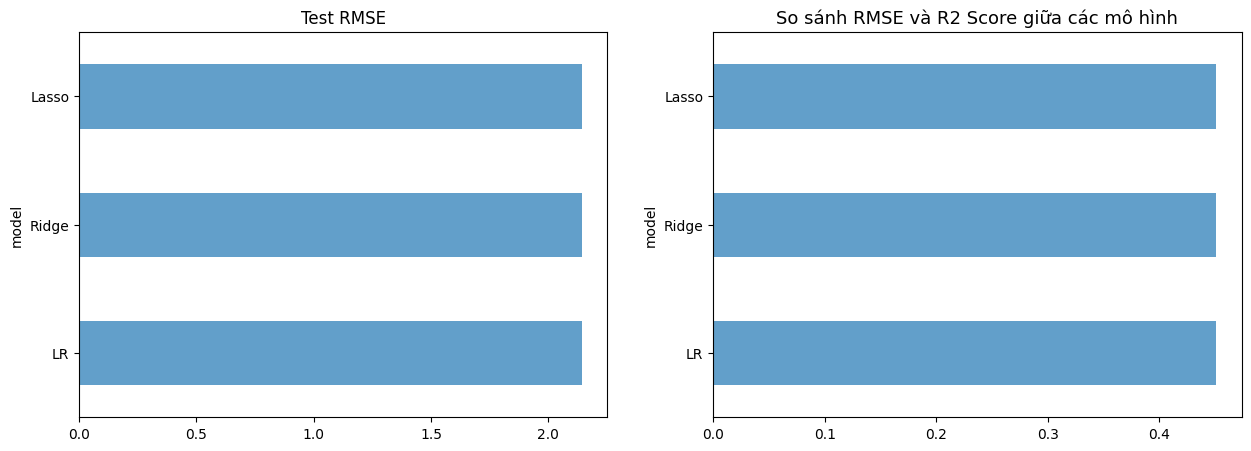

In [ ]:
df_comparison_rmse = pd.DataFrame({'model': ['LR', 'Ridge', 'Lasso'],
                              'test rmse': [mean_squared_error(y_test, pred_linear, squared=False),
                                            mean_squared_error(y_test, pred_ridge, squared=False),
                                            mean_squared_error(y_test, pred_lasso, squared=False)],})

df_comparison_r2 = pd.DataFrame({'model': ['LR', 'Ridge', 'Lasso'],
                                    'test r2': [r2_score(y_test, pred_linear),
                                                r2_score(y_test, pred_ridge),
                                                r2_score(y_test, pred_lasso)],})

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df_comparison_rmse.set_index('model').plot(kind='barh', ax=ax[0], alpha=0.7, legend=False)
df_comparison_r2.set_index('model').plot(kind='barh', ax=ax[1], alpha=0.7, legend=False)
ax[0].set_title('Test RMSE')
ax[1].set_title('Test R2')
plt.title('So sánh RMSE và R2 Score giữa các mô hình', fontsize=13)
plt.show()


### Xây dựng mô hình dự đoán liệu khách hàng có giới thiệu hãng hay không? (Recommended)

#### Chuẩn hóa dữ liệu

In [ ]:
X = df_model.drop(columns=['Recommended'])
y = df_model['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Hồi quy Logistic (Logistic Regression)

In [ ]:
model = LogisticRegression(random_state=9, penalty=None)
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None, random_state=9)

In [ ]:
pred_logictis = model.predict(X_test_scaled)
print(classification_report(y_test, pred_logictis))
print("train Score",model.score(X_train_scaled, y_train))
print("Test Score",model.score(X_test_scaled, y_test))

accuracy_logistic = accuracy_score(y_test, pred_logictis)
f1_logistic = f1_score(y_test, pred_logictis)
recall_logistic = recall_score(y_test, pred_logictis)
precision_logistic = precision_score(y_test, pred_logictis)

data = {'score': [accuracy_logistic, f1_logistic, recall_logistic, precision_logistic]}
index = ['accuracy', 'f1', 'recall', 'precision']

score_logistic = pd.DataFrame(data, index=index)
score_logistic

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3042
           1       0.90      0.92      0.91      1593

    accuracy                           0.94      4635
   macro avg       0.93      0.93      0.93      4635
weighted avg       0.94      0.94      0.94      4635

train Score 0.9460509279240397
Test Score 0.9372168284789644


,score
accuracy,0.937217
f1,0.909599
recall,0.919021
precision,0.900369


- Mô hình đạt được độ chính xác 0.94 trên tập kiểm tra, điều này cho thấy mô hình hoạt động tốt trong việc phân loại đúng các mẫu dữ liệu.
- Precision và Recall:
    - Đối với lớp 0, Precision là 0.96 và Recall là 0.95, cho thấy mô hình rất chính xác trong việc dự đoán lớp 0 và cũng có khả năng tốt trong việc tìm ra các mẫu thuộc lớp 0.
    - Đối với lớp 1, Precision là 0.90 và Recall là 0.92, điều này cho thấy mô hình cũng hoạt động tốt với lớp 1, mặc dù có hơi thấp hơn so với lớp 0.
- F1-score của cả hai lớp là khá cao (0.95 cho lớp 0 và 0.91 cho lớp 1), điều này cho thấy sự cân bằng tốt giữa Precision và Recall cho cả hai lớp.

> Mô hình hồi quy logistic với các chỉ số hiện tại cho thấy hiệu suất tốt trong việc phân loại các mẫu dữ liệu. Độ chính xác cao, mô hình không bị overfitting cùng với các chỉ số Precision, Recall và F1-score đều ở mức tốt, chỉ ra rằng mô hình không chỉ chính xác mà còn đáng tin cậy trong việc phân loại cả hai lớp.

#### Cây Quyết định (Decision Tree)

In [ ]:
def calculate_entropy(data, target_column):
    total_rows = len(data)
    target_values = data[target_column].unique()

    entropy = 0
    for value in target_values:
        value_count = len(data[data[target_column] == value])
        proportion = value_count / total_rows
        entropy -= proportion * math.log2(proportion) if proportion != 0 else 0

    return entropy

def calculate_information_gain(data, feature, target_column):

    unique_values = data[feature].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = data[data[feature] == value]
        proportion = len(subset) / len(data)
        weighted_entropy += proportion * calculate_entropy(subset, target_column)

    return calculate_entropy(data, target_column) - weighted_entropy

In [ ]:
for column in df_model.columns[:-1]:
    entropy = calculate_entropy(df_model, column)
    information_gain = calculate_information_gain(df_model, column, 'Recommended')
    print(f"{column} - Entropy: {entropy:.3f}, Information Gain: {information_gain:.3f}")

Overall_Rating - Entropy: 2.335, Information Gain: 0.426
Type_Of_Traveller - Entropy: 1.900, Information Gain: 0.003
Seat_Type - Entropy: 0.684, Information Gain: 0.015
Seat_Comfort - Entropy: 2.119, Information Gain: 0.340
Cabin_Staff_Service - Entropy: 2.113, Information Gain: 0.357
Ground_Service - Entropy: 1.710, Information Gain: 0.328
Value_For_Money - Entropy: 2.083, Information Gain: 0.640


Với chỉ số Entropy và Information Gain của các thuộc tính trên thì ta chọn ra 5 thuộc tính có chất lượng cao nhất

In [ ]:
selected_feature = ['Overall_Rating', 'Value_For_Money', 'Seat_Comfort', 'Cabin_Staff_Service', 'Ground_Service']

X_id3 = df_model[selected_feature]
y_id3 = df_model['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X_id3, y_id3, test_size=0.2, random_state=9)

In [ ]:
model_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_id3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

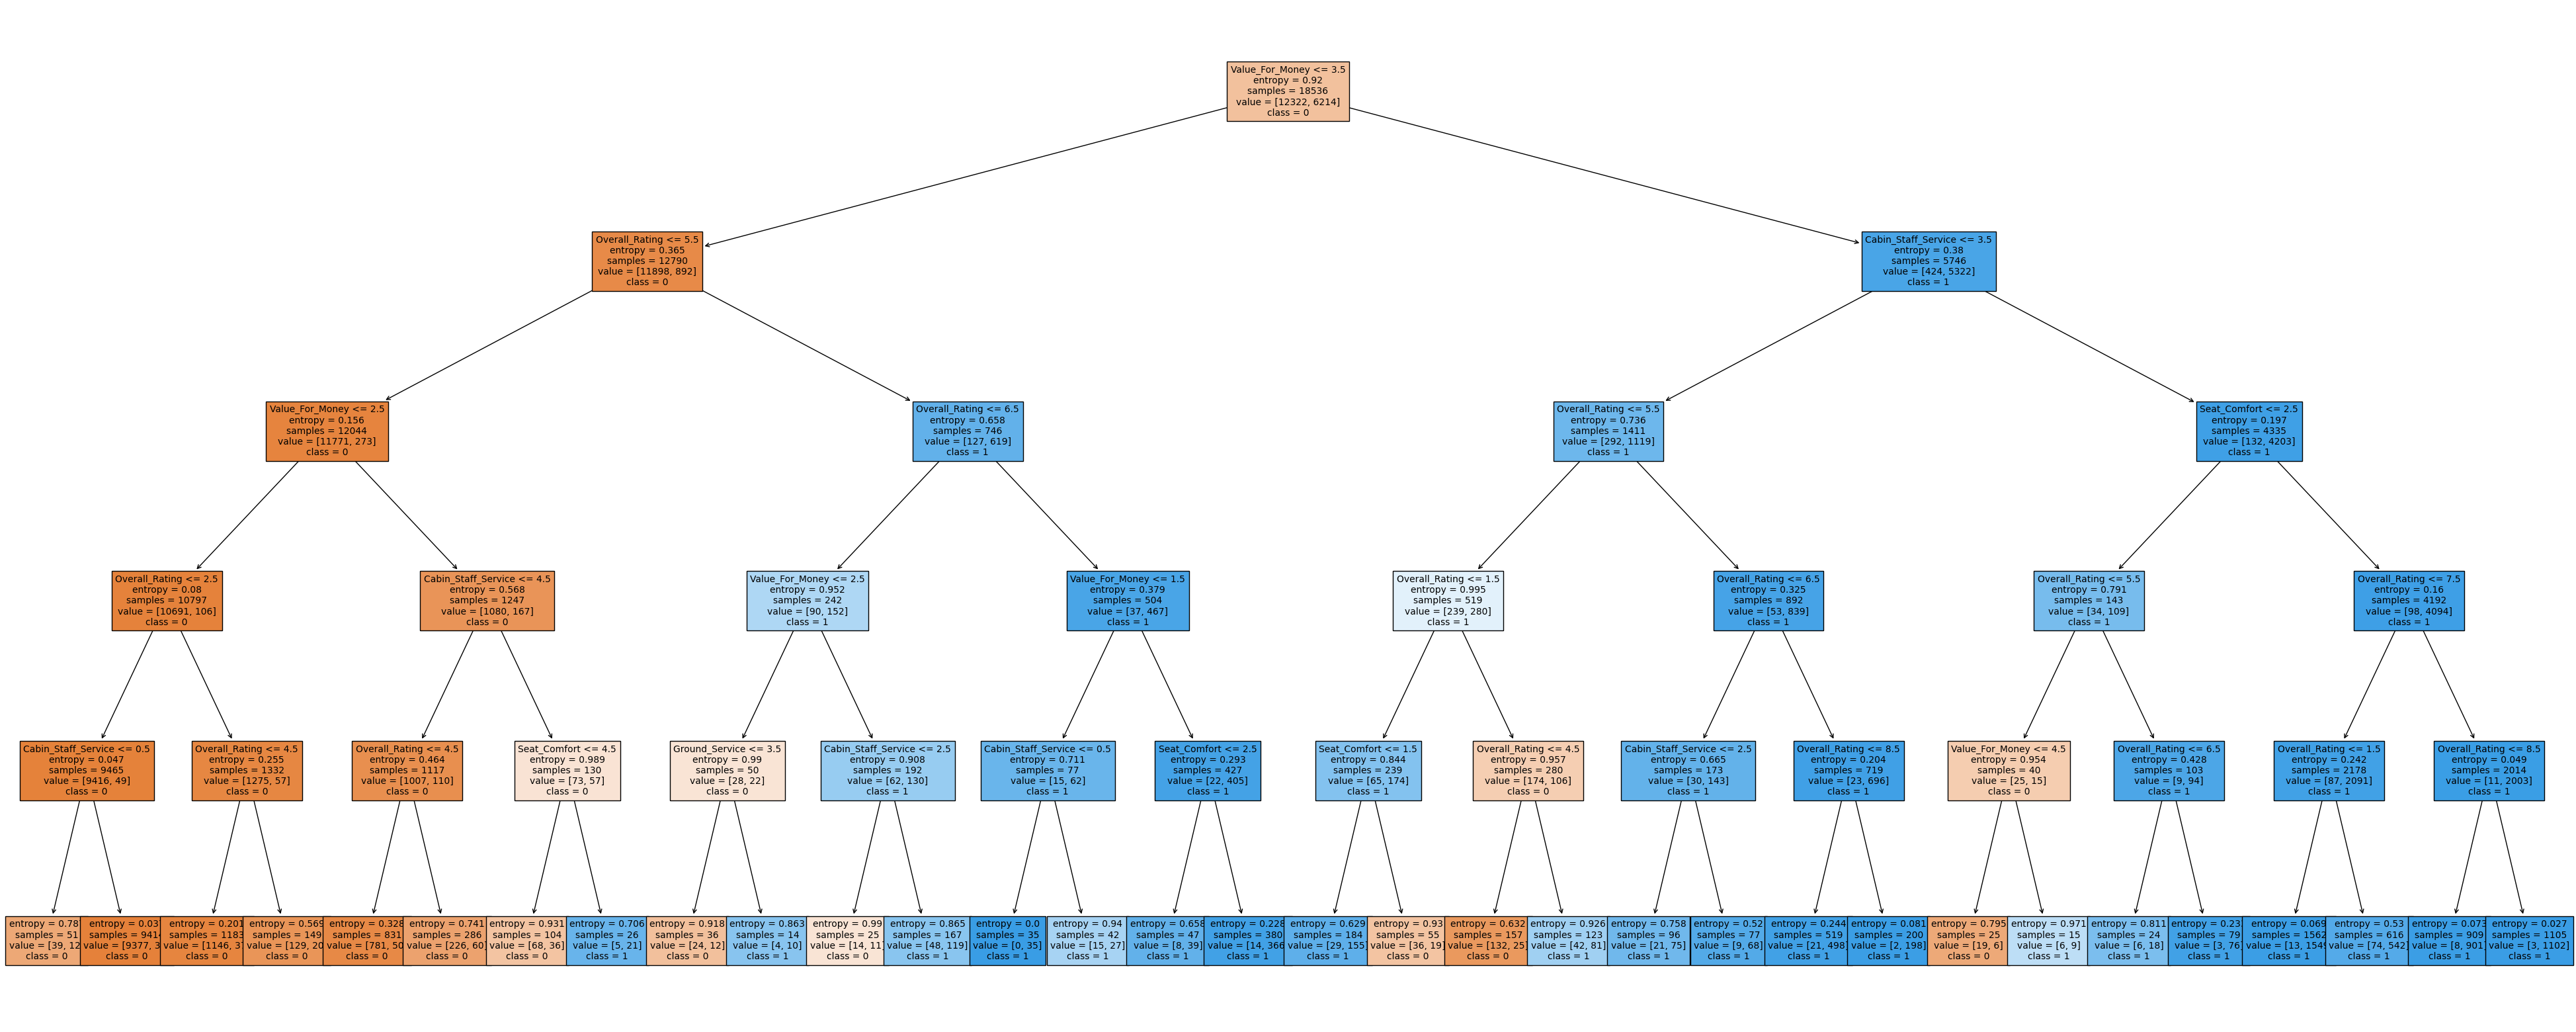

In [ ]:
plt.figure(figsize=(50,20))
tree.plot_tree(model_id3, filled=True, feature_names=selected_feature, class_names=['0', '1'], fontsize=10)
plt.show()

In [ ]:
y_pred_id3 = model_id3.predict(X_test)

accuracy_id3 = accuracy_score(y_pred=y_pred_id3, y_true=y_test)
f1_id3 = f1_score(y_pred=y_pred_id3, y_true=y_test)
recall_id3 = recall_score(y_pred=y_pred_id3, y_true=y_test)
precision_id3 = precision_score(y_pred=y_pred_id3, y_true=y_test)

data_id3 = {'score': [accuracy_id3, f1_id3, recall_id3, precision_id3]}
index = ['accuracy_id3', 'f1_id3', 'recall_id3', 'precision_id3']

score_id3 = pd.DataFrame(data_id3, index=index)
score_id3

,score
accuracy_id3,0.955987
f1_id3,0.936646
recall_id3,0.946642
precision_id3,0.926859


- `Accuracy` = 0.955987 (95.6%), mô hình Decision Tree cho thấy hiệu suất rất cao và khả năng phân loại chính xác các mẫu.
- `F1 Score` = 0.936646 (93.67%), mô hình có sự cân bằng tốt giữa precision và recall, cho thấy mô hình không chỉ chính xác mà còn hiệu quả trong việc nhận diện đúng các mẫu thuộc cả hai lớp.
- `Recall` = 0.946642 (94.66%), mô hình có khả năng phát hiện rất tốt các trường hợp dương tính, nghĩa là nó không bỏ sót nhiều trường hợp dương tính.
- `Precision` = 0.926859 (92.68%), mô hình đảm bảo rằng phần lớn các dự đoán dương tính của nó là chính xác.

> - Các chỉ số accuracy, f1, recall, và precision đều rất cao, cho thấy mô hình Decision Tree ID3 có hiệu suất tuyệt vời trong việc phân loại dữ liệu.
> - Với precision và recall cao, mô hình không chỉ chính xác mà còn có khả năng phát hiện hầu hết các trường hợp dương tính, đồng thời giữ tỷ lệ sai sót thấp.
> - F1 Score cao chỉ ra rằng mô hình đạt được sự cân bằng tốt giữa precision và recall, nghĩa là mô hình không chỉ phát hiện chính xác các trường hợp dương tính mà còn ít dự đoán sai các trường hợp dương tính.

#### Rừng ngẫu nhiên (Random Forest)

In [ ]:
X = df_model.drop(columns=['Recommended'])
y = df_model['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

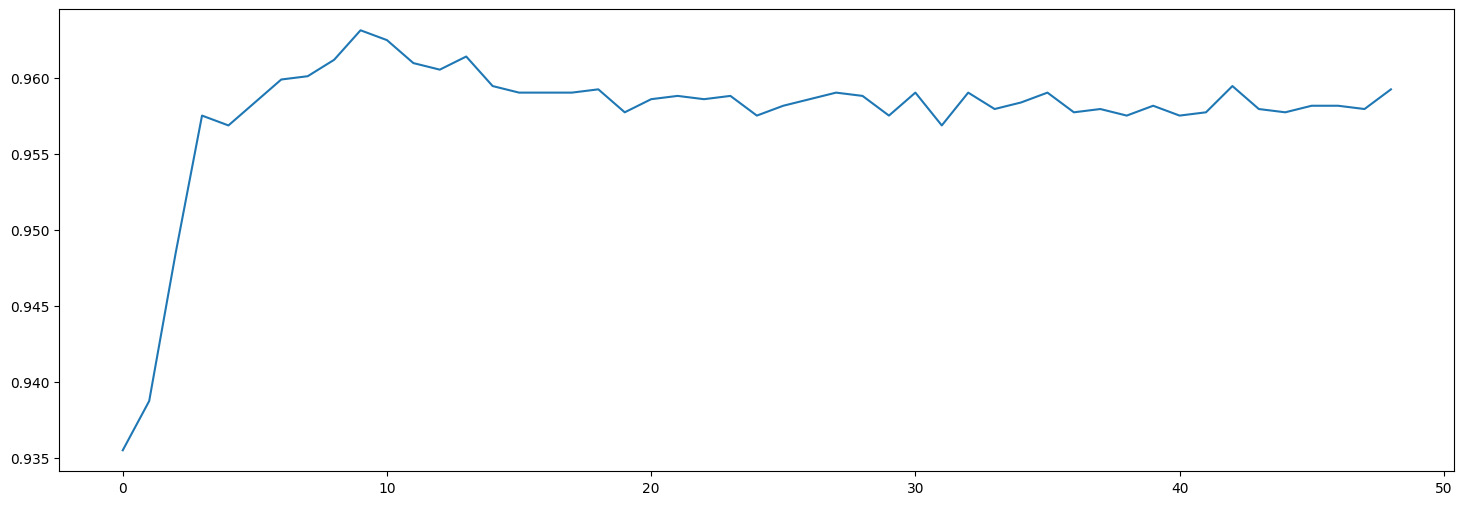

In [ ]:
score = []
for i in range(1, 50):
    random_forest_classifier = RandomForestClassifier(max_depth=i)
    random_forest_classifier.fit(X_train, y_train)
    y_pred_random_forest = random_forest_classifier.predict(X_test)
    score.append(accuracy_score(y_test, y_pred_random_forest))

plt.figure(figsize=(18, 6))
plt.plot(score)
plt.show()

In [ ]:
random_forest_classifier = RandomForestClassifier(max_depth=9)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=9)

In [ ]:
y_pred_random_forest = random_forest_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)

data = {'score': [accuracy_rf, f1_rf, recall_rf, precision_rf]}
index = ['accuracy_rf', 'f1_rf', 'recall_rf', 'precision_rf']

score_random_forest = pd.DataFrame(data, index=index)
score_random_forest

,score
accuracy_rf,0.962460
f1_rf,0.945929
recall_rf,0.955430
precision_rf,0.936615


- `Accuracy` = 0.963107 (96.31%), mô hình Random Forest cho thấy hiệu suất rất cao và khả năng phân loại chính xác các mẫu.
- `F1 Score` = 0.946712 (94.67%), mô hình có sự cân bằng tốt giữa precision và recall, cho thấy mô hình không chỉ chính xác mà còn hiệu quả trong việc nhận diện đúng các mẫu thuộc cả hai lớp
- `Recall` = 0.953547 (95.35%), mô hình có khả năng phát hiện rất tốt các trường hợp dương tính, nghĩa là nó không bỏ sót nhiều trường hợp dương tính.
- `Precision` = 0.939975 (93.99%), mô hình đảm bảo rằng phần lớn các dự đoán dương tính của nó là chính xác.

> - Các chỉ số accuracy, f1, recall, và precision đều rất cao, cho thấy mô hình Random Forest có hiệu suất tuyệt vời trong việc phân loại dữ liệu.
> - Với precision và recall cao, mô hình không chỉ chính xác mà còn có khả năng phát hiện hầu hết các trường hợp dương tính, đồng thời giữ tỷ lệ sai sót thấp.
> - F1 Score cao chỉ ra rằng mô hình đạt được sự cân bằng tốt giữa precision và recall, nghĩa là mô hình không chỉ phát hiện chính xác các trường hợp dương tính mà còn ít dự đoán sai các trường hợp dương tính.
> - Các chỉ số của Random Forest và Decision Tree ID3 đều rất cao, nhưng Random Forest thường có ưu thế hơn về khả năng tổng quát hóa và giảm thiểu overfitting do sử dụng nhiều cây quyết định.

In [ ]:
feature_scores = pd.Series(random_forest_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Value_For_Money        0.366910
Overall_Rating         0.279566
Cabin_Staff_Service    0.121615
Ground_Service         0.111299
Seat_Comfort           0.106280
Type_Of_Traveller      0.010381
Seat_Type              0.003949
dtype: float64

Từ chỉ số đánh giá tầm quan trọng trên, ta có thể thấy rằng thuộc tính quan trọng nhất là `Value_For_Money` và thuộc tính ít quan trọng nhất đối với việc phân định liệu khách hàng có giới thiệu hãng bay không là `Seat_Type`.

### Xây dựng mô hình để phân loại các nhóm khách hàng

#### K-Means
##### Elbow Method & Silhouette Score Method

In [ ]:
data = df.drop(columns=['Review', 'review_datetime'])

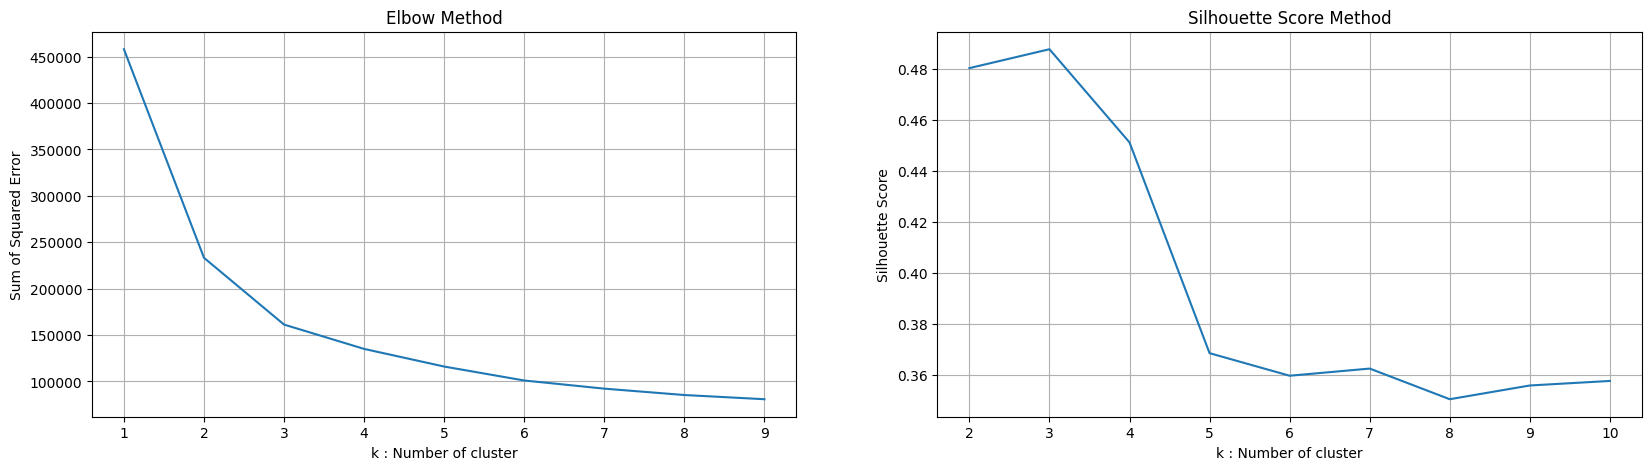

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(data)
    labels = kmeans.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sns.lineplot(x = range(2, kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

Tham số k xác định số cụm hoặc nhóm mà dữ liệu sẽ được chia thành. Để lựa chọn các giá trị của k, chúng ta sử dụng 2 phép kiểm định thống kê:
- Phương pháp khuỷu tay (Elbow): Đây là phương pháp vẽ tổng sai số bình phương cho một phạm vi giá trị của k. Nếu biểu đồ này trông giống như một cánh tay thì k là giá trị giống với khuỷu tay được chọn. Từ giá trị khuỷu tay này, tổng các giá trị bình phương bắt đầu giảm theo kiểu tuyến tính và do đó được coi là giá trị tối ưu.
- Phương pháp tính điểm Silhouette: Đây là phương pháp đánh giá chất lượng của các cụm về mức độ các điểm dữ liệu được phân cụm với các điểm dữ liệu khác tương tự nhau như thế nào. Điểm này được tính bằng công thức khoảng cách và giá trị k có điểm cao nhất được chọn để lập mô hình.

Từ 2 biểu đồ trên, ta sẽ chọn hệ số k (Clusters) = 3.

In [ ]:
res = data.copy()

In [ ]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(data)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
res['K_Means_Class'] = labels

In [ ]:
res.head()

,Overall_Rating,Type_Of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,K_Means_Class
0,9,0,0,4.0,5.0,4.0,3.0,1,0
1,1,0,0,2.0,2.0,1.0,2.0,0,1
2,1,0,0,2.0,1.0,1.0,2.0,0,1
3,1,0,0,1.0,1.0,1.0,1.0,0,1
4,1,1,0,1.0,1.0,1.0,1.0,0,1


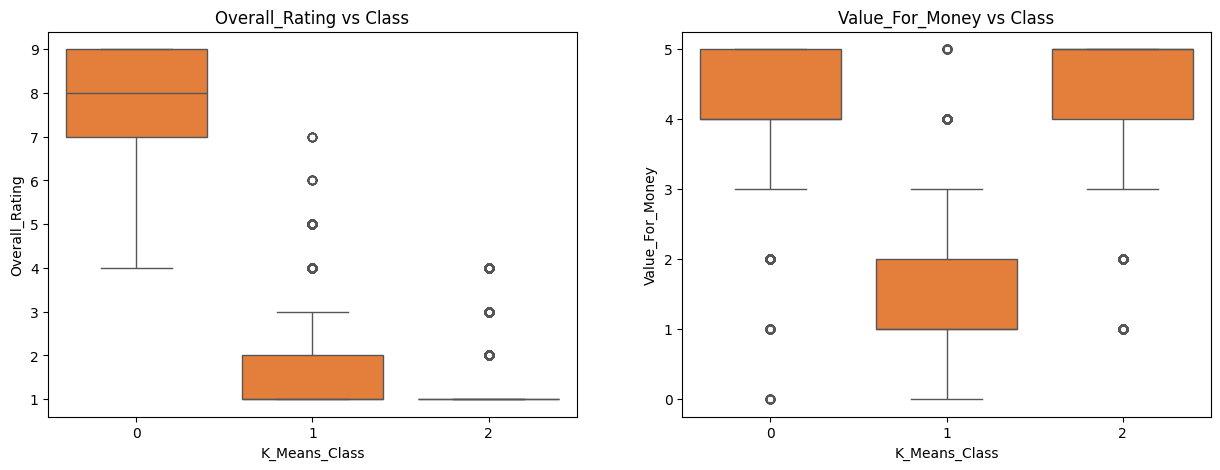

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'K_Means_Class', y = 'Overall_Rating', data  = res, color = '#FF781F');
plt.title('Overall_Rating vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'K_Means_Class', y = 'Value_For_Money', data  = res, color = '#FF781F');
plt.title('Value_For_Money vs Class')

plt.show()

Chúng ta có thể nhận ra 3 nhóm sau:
- Nhóm 1: Những người có đánh giá thấp và cho rằng chất lượng đi với số tiền là tệ.
- Nhóm 0: Những người có đánh giá cao và cho rằng chất lượng đi đôi với số tiền
- Nhóm 2: Những người cho đánh giá tệ nhưng chất lượng cho số tiền bỏ ra là cao.

#### DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

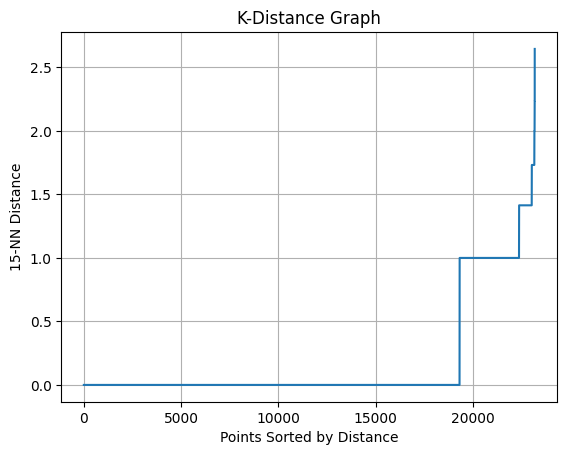

In [ ]:
knn = NearestNeighbors(n_neighbors = 8)
model = knn.fit(data)
distances, indices = knn.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('8-NN Distance')
plt.title('K-Distance Graph');

Các tham số đóng một vai trò quan trọng trong quá trình này. Vì vậy chúng có những quy tắc nhất định để có thể gán giá trị:
- minPts: Nếu D đại diện cho số chiều của dữ liệu (số thuộc tính) thì minPts >= D + 1. Thông thường minPts >= 2 * D được chọn cho các tập dữ liệu nhỏ hoặc chứa nhiều nhiễu.
- Epsilon: Giá trị của nó thường được quyết định bằng biểu đồ khoảng cách k (K-Distance Graph) được xác định từ mô hình KNN. Giá trị tại điểm mà đồ thị thay đổi mạnh sẽ được chọn.

Chúng ta chọn:
- minPts = 9 tức là >= 8 + 1.
- Giá trị được gán cho n_neighbors: minPts - 1 = 8.

Từ biểu đồ trên, ta chọn: eps = 1

In [ ]:
db = DBSCAN(eps = 1, min_samples = 9).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

res['DBSCAN_Class'] = labels

Number of Clusters :  4
Number of Outliers :  2609


In [ ]:
res.head()

,Overall_Rating,Type_Of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended,K_Means_Class,DBSCAN_Class
0,9,0,0,4.0,5.0,4.0,3.0,1,0,0
1,1,0,0,2.0,2.0,1.0,2.0,0,1,0
2,1,0,0,2.0,1.0,1.0,2.0,0,1,0
3,1,0,0,1.0,1.0,1.0,1.0,0,1,0
4,1,1,0,1.0,1.0,1.0,1.0,0,1,0


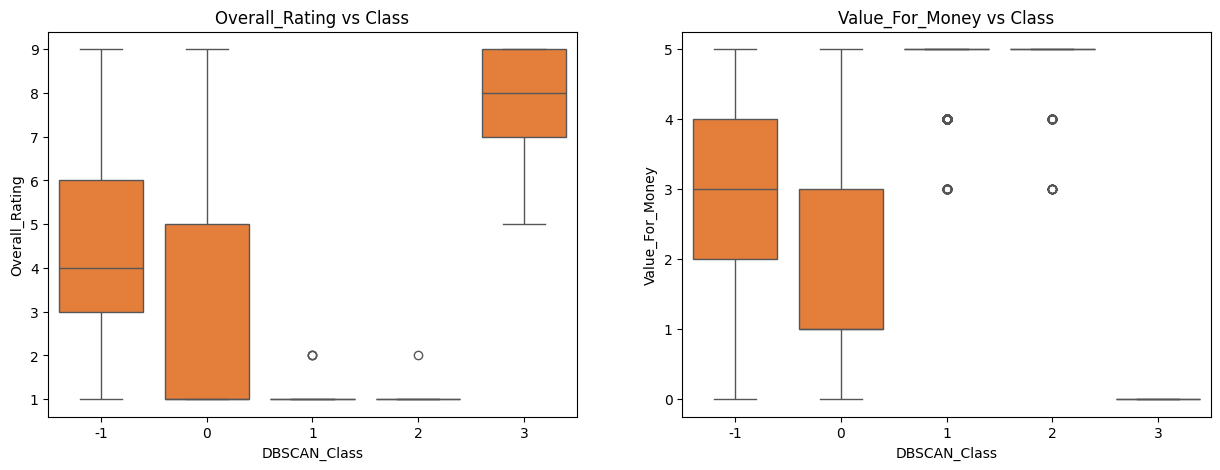

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'DBSCAN_Class', y = 'Overall_Rating', data  = res, color = '#FF781F');
plt.title('Overall_Rating vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'DBSCAN_Class', y = 'Value_For_Money', data  = res, color = '#FF781F');
plt.title('Value_For_Money vs Class')

plt.show()

Tương tự như K-Means, chúng ta chia được làm 5 nhóm:
- Nhóm -1: Các điểm ngoại lai
- Nhóm 0: Những người có đánh giá thấp và cho rằng chất lượng đi với số tiền là tệ.
- Nhóm 1: Những người có đánh giá thấp nhưng lại cho rằng chất lượng cho số tiền bỏ ra là cao
- Nhóm 2: Những người có đánh giá thấp nhưng lại cho rằng chất lượng cho số tiền bỏ ra là cao
- Nhóm 3: Những người cho đánh giá cao nhưng chất lượng cho số tiền bỏ ra là thấp.

Chúng ta cũng thấy nhóm 1 và 2 có sự giống nhau. Thế nên chúng ta sẽ tìm hiểu sâu hơn để thấy được sự khác biệt.

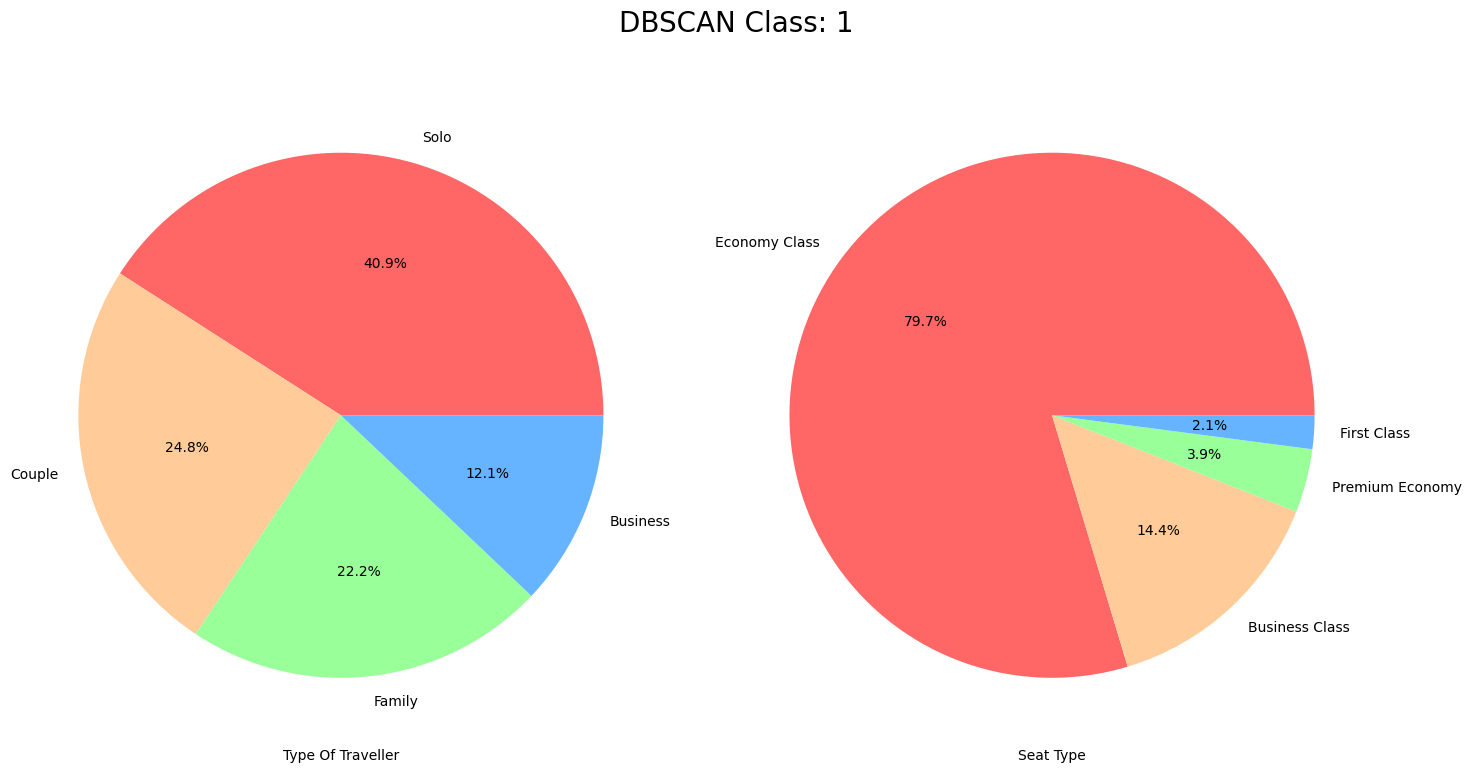

In [ ]:
a = res[res['DBSCAN_Class'] == 1]['Type_Of_Traveller'].value_counts()
b = res[res['DBSCAN_Class'] == 1]['Seat_Type'].value_counts()

labels_a = ['Solo', 'Couple', 'Family', 'Business']
sizes_a = a.values
labels_b = ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']
sizes_b = b.values
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0']

plt.figure(figsize=(15, 8))
plt.suptitle('DBSCAN Class: 1', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(sizes_a, labels=labels_a, colors=colors, autopct='%1.1f%%')
plt.xlabel('Type Of Traveller')

plt.subplot(1, 2, 2)
plt.pie(sizes_b, labels=labels_b, colors=colors, autopct='%1.1f%%')
plt.xlabel('Seat Type')

plt.tight_layout()
plt.show()

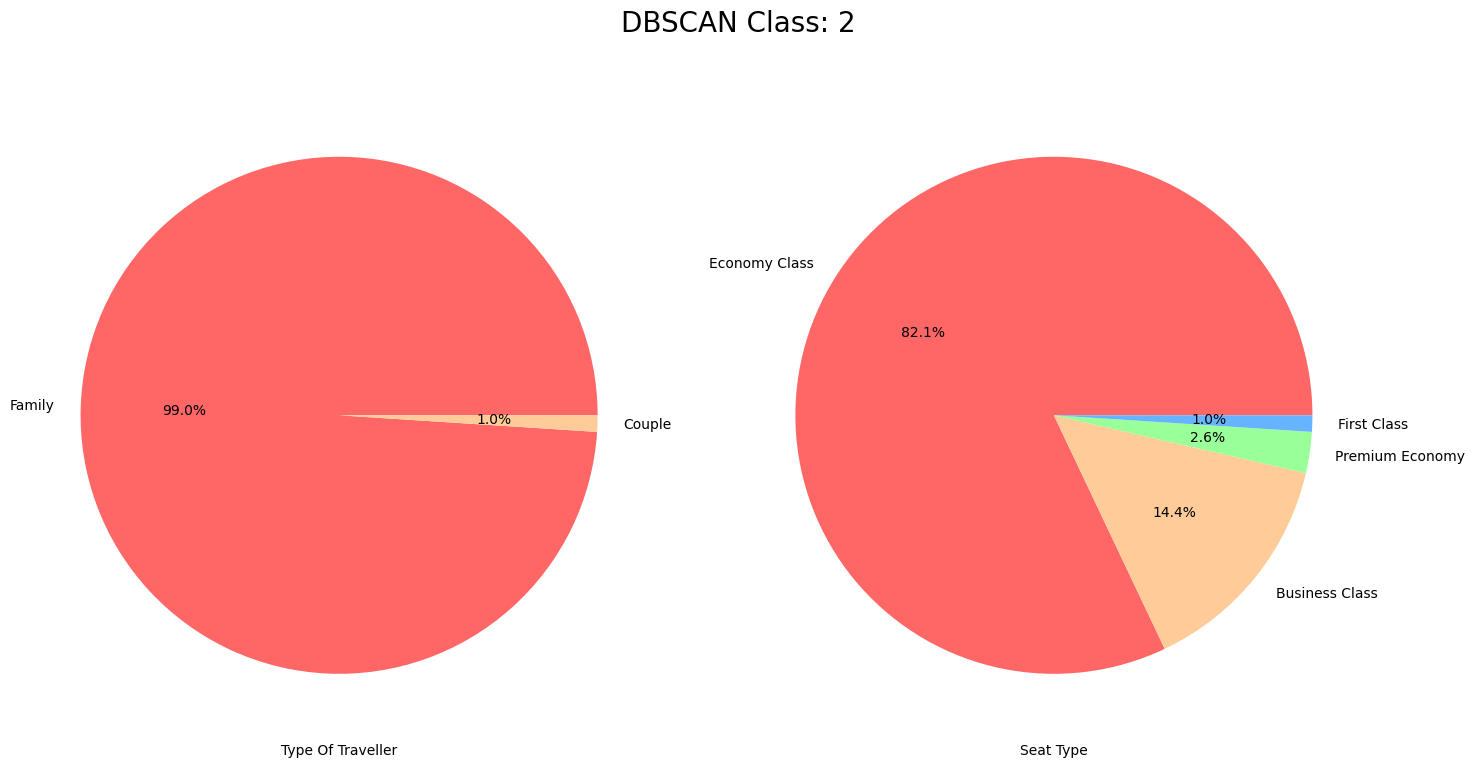

In [ ]:
a = res[res['DBSCAN_Class'] == 2]['Type_Of_Traveller'].value_counts()
b = res[res['DBSCAN_Class'] == 2]['Seat_Type'].value_counts()

labels_a = ['Family', 'Couple']
sizes_a = a.values
labels_b = ['Economy Class', 'Business Class', 'Premium Economy', 'First Class']
sizes_b = b.values
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0']

plt.figure(figsize=(15, 8))
plt.suptitle('DBSCAN Class: 2', fontsize=20)

plt.subplot(1, 2, 1)
plt.pie(sizes_a, labels=labels_a, colors=colors, autopct='%1.1f%%')
plt.xlabel('Type Of Traveller')

plt.subplot(1, 2, 2)
plt.pie(sizes_b, labels=labels_b, colors=colors, autopct='%1.1f%%')
plt.xlabel('Seat Type')

plt.tight_layout()
plt.show()

Từ 2 đồ thị trên ta thấy:
- Nhóm 1 chủ yếu là những người đi dưới dạng cá nhân và nhóm 2 là những người đi theo nhóm (Gia đình và theo cặp).
- Cả 2 nhóm đều chủ yếu đi hạng vé phổ thông.

## Khai phá dữ liệu

### Khai phá luật kết hợp

In [ ]:
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
data  = df.drop(columns=['Overall_Rating', 'Review', 'review_datetime'])

Ta tiến hành đi giải nghĩa các số liệu trong dữ liệu để có thể cho ta một ý nghĩa của các đánh giá.

In [ ]:
def ExplainTravel(x):
  temp = {0: 'Solo Leisure', 1: 'Couple Leisure', 2: 'Business', 3: 'Family Leisure'}
  return temp[x]

def ExplainSeat(x):
  temp = {0: 'Economy Class', 1: 'Business Class', 2: 'Premium Economy', 3: 'First Class'}
  return temp[x]

def ExplainSeatComfort(x):
  temp = {0.0: 'Seat\'s very uncomfortable', 1.0: 'Seat\'s uncomfortable', 2.0: 'Seat\'s not that bad', 3.0: 'Seat is quite good', 4.0: 'Seat is great', 5.0: 'As soft as heaven'}
  return temp[x]

def ExplainCabin(x):
  temp = {0.0: 'Cabin service is awful', 1.0: 'Cabin service is bad', 2.0: 'Cabin service is normal', 3.0: 'Cabin service is quite good', 4.0: 'Cabin service is great', 5.0: 'I was treated like a VIP'}
  return temp[x]

def ExplainGround(x):
  temp = {0.0: 'Ground service is awful', 1.0: 'Ground service is bad', 2.0: 'Ground service is normal', 3.0: 'Ground service is quite good', 4.0: 'Ground service is great', 5.0: 'Ground service is phenominal'}
  return temp[x]

def ExplainValue(x):
  temp = {0.0: 'Not worth the cost', 1.0: 'The quality could be better', 2.0: 'The quality is neither great nor terrible', 3.0: 'It is worth considering', 4.0: 'A great deal!', 5.0: 'Definitely worth every penny!'}
  return temp[x]

def ExplainRecommend(x):
  temp = ['Not Recommended', 'Highly Recommended']
  return temp[x]

In [ ]:
data['Type_Of_Traveller'] = data['Type_Of_Traveller'].apply(ExplainTravel)
data['Seat_Type'] = data['Seat_Type'].apply(ExplainSeat)
data['Seat_Comfort'] = data['Seat_Comfort'].apply(ExplainSeatComfort)
data['Cabin_Staff_Service'] = data['Cabin_Staff_Service'].apply(ExplainCabin)
data['Ground_Service'] = data['Ground_Service'].apply(ExplainGround)
data['Value_For_Money'] = data['Value_For_Money'].apply(ExplainValue)
data['Recommended'] = data['Recommended'].apply(ExplainRecommend)

In [ ]:
data.head()

,Type_Of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Value_For_Money,Recommended
0,Solo Leisure,Economy Class,Seat is great,I was treated like a VIP,Ground service is great,It is worth considering,Highly Recommended
1,Solo Leisure,Economy Class,Seat's not that bad,Cabin service is normal,Ground service is bad,The quality is neither great nor terrible,Not Recommended
2,Solo Leisure,Economy Class,Seat's not that bad,Cabin service is bad,Ground service is bad,The quality is neither great nor terrible,Not Recommended
3,Solo Leisure,Economy Class,Seat's uncomfortable,Cabin service is bad,Ground service is bad,The quality could be better,Not Recommended
4,Couple Leisure,Economy Class,Seat's uncomfortable,Cabin service is bad,Ground service is bad,The quality could be better,Not Recommended


Ta tiến hành chuyển đổi dữ liệu hiện có của ta sang dạng ma trận nhị phân. Trong đó mỗi hàng đại diện cho một dòng trong dữ liệu gốc.

In [ ]:
dataset = [data.loc[i].dropna()[1:-1].values for i in range(len(data))]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
data = pd.DataFrame(te_ary, columns=te.columns_)
data.head()

,A great deal!,As soft as heaven,Business Class,Cabin service is awful,Cabin service is bad,Cabin service is great,Cabin service is normal,Cabin service is quite good,Definitely worth every penny!,Economy Class,...,It is worth considering,Not worth the cost,Premium Economy,Seat is great,Seat is quite good,Seat's not that bad,Seat's uncomfortable,Seat's very uncomfortable,The quality could be better,The quality is neither great nor terrible
0,False,False,False,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Define the minimum support threshold (e.g., 0.4 means an itemset must appear in at least 40% of transactions)
min_support = 0.4

# Perform frequent itemset mining using Apriori
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.441543                             (Cabin service is bad)
1   0.873549                                    (Economy Class)
2   0.615683                            (Ground service is bad)
3   0.452807                             (Seat's uncomfortable)
4   0.467179                      (The quality could be better)
5   0.409823              (Cabin service is bad, Economy Class)
6   0.401450      (Cabin service is bad, Ground service is bad)
7   0.561650             (Ground service is bad, Economy Class)
8   0.419878              (Seat's uncomfortable, Economy Class)
9   0.428078       (The quality could be better, Economy Class)
10  0.407794      (Ground service is bad, Seat's uncomfortable)
11  0.418368  (The quality could be better, Ground service i...


Bảng trên hiển thị các tập hợp phổ biến (frequent itemsets) trong dữ liệu:
- support là tỷ lệ xuất hiện của tập hợp phổ biến trong dữ liệu. Ví dụ, tập hợp 'Cabin service is bad' xuất hiện trong khoảng 44.15% tập dữ liệu.
- itemsets: Đây là tập hợp các items được kết hợp lại. Ví dụ, tập hợp '(Cabin service is bad, Economy Class)' đại diện cho việc khách hàng đã trải qua cả hai trạng thái 'Cabin service is bad' và 'Economy Class'.

In [ ]:
# Generate association rules with minimum confidence threshold (e.g., 0.6)
min_confidence = 0.6
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

print("\nAssociation Rules:")
association_rules_df[['antecedents', 'consequents', 'support', 'confidence','lift']]


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(Cabin service is bad),(Economy Class),0.409823,0.928160,1.062516
1,(Cabin service is bad),(Ground service is bad),0.401450,0.909198,1.476729
2,(Ground service is bad),(Cabin service is bad),0.401450,0.652040,1.476729
3,(Ground service is bad),(Economy Class),0.561650,0.912239,1.044291
4,(Economy Class),(Ground service is bad),0.561650,0.642952,1.044291
5,(Seat's uncomfortable),(Economy Class),0.419878,0.927278,1.061507
6,(The quality could be better),(Economy Class),0.428078,0.916305,1.048945
7,(Ground service is bad),(Seat's uncomfortable),0.407794,0.662344,1.462750
8,(Seat's uncomfortable),(Ground service is bad),0.407794,0.900591,1.462750
9,(The quality could be better),(Ground service is bad),0.418368,0.895520,1.454513


Bảng trên hiển thị các quy tắc kết hợp (association rules) giữa các tập hợp phổ biến (frequent itemsets) trong dữ liệu:
- antecedents là tập hợp items xuất hiện trước trong quy tắc. Ví dụ, tập hợp '(Cabin service is bad)' là mặt hàng xuất hiện trước.
- consequents là tập hợp items xuất hiện sau trong quy tắc. Ví dụ, tập hợp '(Economy Class)' là mặt hàng xuất hiện sau.
- support là tỷ lệ xuất hiện của quy tắc trong dữ liệu. Ví dụ, quy tắc '(Cabin service is bad) → (Economy Class)' xuất hiện trong khoảng 40.98% tập dữ liệu.
- confidence là tỷ lệ khả năng xuất hiện của tập hợp consequents khi đã biết tập hợp antecedents. Ví dụ, khi khách hàng trải qua 'Cabin service is bad', khả năng họ có hạng vé là 'Economy Class' là 92.82%.
- lift là chỉ số đo lường mức độ tương quan giữa antecedents và consequents. Nếu lift > 1 nghĩa là việc chọn consequents có liên quan tích cực đến việc chọn antecedents. Ví dụ, lift của quy tắc '(Cabin service is bad) → (Economy Class)' là 1.06, vượt qua giá trị 1, cho thấy mối quan hệ tích cực.

### Phân tích văn bản để phân loại thái độ bài đánh giá

In [ ]:
data = df[['Review', 'Recommended']]
data.head()

,Review,Recommended
0,Moroni to Moheli. Turned out to be a pretty ...,1
1,Moroni to Anjouan. It is a very small airline...,0
2,Anjouan to Dzaoudzi. A very small airline an...,0
3,Please do a favor yourself and do not fly wi...,0
4,Do not book a flight with this airline! My fr...,0


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
import re

In [ ]:
def print_message(index):
    example = data[data.index == index][['Review', 'Recommended']].values[0]
    if len(example) > 0:
        print(example[0])
        if example[1] == 0:
          print('Attitude: Negative')
        else:
          print('Attitude: Positive')

In [ ]:
print_message(5)

  Had very bad experience with rerouted and cancelled flights last weekend with Adria airways. Original Route was Ljubljana to Sarajevo return. Two weeks before i received an email that the flight was cancelled. Offered route change was Ljubljana to Sarajevo via Munich. Flight back changed to Sarajevo-Pristina-Ljubljana. I accepted. The first flight via Munich was ok. Two hours before the return flight I got the email that the flight was cancelled. I had to rebook via hotline and had to accept a flight with Croatian to Zagreb. I reached Ljubljana 4 h later and had to organize Transport from Zagreb to Ljubljana on my own cost. Do not book flights with Adria airways. I heard that their financial situation is very very bad.
Attitude: Negative


In [ ]:
print_message(15)

  Frankfurt to Ljubljana. Flight was very comfortable, professional crew. The monitors above passengers provide informations about flight (speed, altitude, temperature, time to landing, etc.)
Attitude: Positive


In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    return text
data['Review'] = data['Review'].apply(cleanText)

<ipython-input-28-529b6b35dd63>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text
<ipython-input-28-529b6b35dd63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(cleanText)


In [ ]:
train, test = train_test_split(data, test_size=0.2 , random_state=42)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Ta tiến hành chuyển đổi các văn bản thành chuỗi các số nguyên dựa trên từ điển đã học - từ điển lấy từ cột 'Review'.

In [ ]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Review']), tags=[r['Recommended']]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Review']), tags=[r['Recommended']]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Review'].values)
X = tokenizer.texts_to_sequences(data['Review'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 23171 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['Review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (23171, 50)


In [ ]:
train_tagged.values[0]

TaggedDocument(words=['the', 'worst', 'airline', 'i', 'ever', 'experienced', '.', 'nothing', 'deserves', 'above', '2', 'stars', 'and', 'no', 'words', 'to', 'describe', '.', 'i', 'regret', 'i', 'did', 'not', 'read', 'feedback', 'before', 'i', 'booked', 'my', 'tickets', '.'], tags=[0])

#### Chuyển văn bản thành vector
Doc2Vec là phần mở rộng của Word2Vec, học cách biểu diễn vectơ cho toàn bộ tài liệu thay vì chỉ các từ riêng lẻ. Bằng cách điều chỉnh tốc độ học tập và đào tạo qua nhiều epoch, mô hình này sẽ nắm bắt được các phần tài liệu có ý nghĩa.

In [ ]:
d2v_model = Doc2Vec(dm=1, dm_mean=1, vector_size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
d2v_model.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 18536/18536 [00:00<00:00, 1085726.52it/s]


In [ ]:
%%time
for epoch in range(30):
    d2v_model.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    d2v_model.alpha -= 0.002
    d2v_model.min_alpha = d2v_model.alpha

100%|██████████| 18536/18536 [00:00<00:00, 1083109.77it/s]


CPU times: user 3min 13s, sys: 690 ms, total: 3min 14s
Wall time: 3min 18s


In [ ]:
print(d2v_model)

Doc2Vec<dm/m,d20,n5,w8,s0.001>


In [ ]:
len(d2v_model.wv.key_to_index)

39364

In [ ]:
# save the vectors in a new matrix
embedding_matrix = np.zeros((len(d2v_model.wv)+ 1, 20))

for i, vec in enumerate(d2v_model.dv.vectors):
    while i in vec <= 1000:
          embedding_matrix[i]=vec

In ra các từ có độ tương quan cosine giống với từ cho trước (Ở đây là 'worst').

In [ ]:
d2v_model.wv.most_similar(positive=['worst'], topn=10)

[('terrible', 0.8471802473068237),
 ('horrible', 0.8318238854408264),
 ('best', 0.811126708984375),
 ('poorest', 0.7979906797409058),
 ('piedmont', 0.7933513522148132),
 ('unacceptable', 0.7892801761627197),
 ('deplorable', 0.7823790311813354),
 ('horrendous', 0.7768862843513489),
 ('helpless', 0.7701637148857117),
 ('smallest', 0.7682031393051147)]

#### Xây dựng Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import tensorflow as tf

In [ ]:
# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv) + 1, 20, input_length=X.shape[1], weights=[embedding_matrix], trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))

model.add(LSTM(50, return_sequences=False))
model.add(Dense(2, activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 20)            787300    
                                                                 
 lstm_16 (LSTM)              (None, 50)                14200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 801602 (3.06 MB)
Trainable params: 801602 (3.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ta tạo ra một mô hình với tầng đầu tiên là tầng nhúng (embedding) để chuyển đổi các từ được mã hóa số thành các dense vector (phần nhúng).

Tiếp đến ta thêm vào một tầng LSTM với 50 neurons. Cuối cùng, ta thêm một lớp dense với hai đầu ra và hàm kích hoạt softmax.

Ta biên dịch mô hình bằng cách chỉ định trình tối ưu hóa Adam, hàm mất mát 'binary_crossentropy' và phương thức đánh giá sử dụng 'Accuracy'.

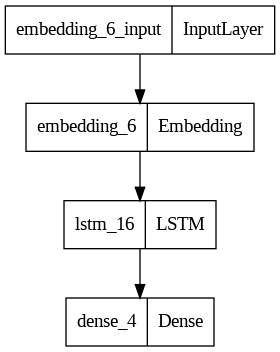

In [ ]:
from keras.utils import plot_model
plot_model(model)

#### Huấn luyện mô hình

In [ ]:
Y = pd.get_dummies(data['Recommended']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(19695, 50) (19695, 2)
(3476, 50) (3476, 2)


In [ ]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs=50, batch_size=batch_size, verbose=2)

Epoch 1/50
616/616 - 31s - loss: 0.3545 - acc: 0.8489 - 31s/epoch - 50ms/step
Epoch 2/50
616/616 - 25s - loss: 0.2287 - acc: 0.9140 - 25s/epoch - 40ms/step
Epoch 3/50
616/616 - 22s - loss: 0.1788 - acc: 0.9376 - 22s/epoch - 35ms/step
Epoch 4/50
616/616 - 19s - loss: 0.1427 - acc: 0.9507 - 19s/epoch - 31ms/step
Epoch 5/50
616/616 - 21s - loss: 0.1119 - acc: 0.9612 - 21s/epoch - 33ms/step
Epoch 6/50
616/616 - 19s - loss: 0.0901 - acc: 0.9697 - 19s/epoch - 31ms/step
Epoch 7/50
616/616 - 19s - loss: 0.0709 - acc: 0.9773 - 19s/epoch - 30ms/step
Epoch 8/50
616/616 - 18s - loss: 0.0577 - acc: 0.9826 - 18s/epoch - 29ms/step
Epoch 9/50
616/616 - 19s - loss: 0.0511 - acc: 0.9847 - 19s/epoch - 31ms/step
Epoch 10/50
616/616 - 20s - loss: 0.0400 - acc: 0.9876 - 20s/epoch - 33ms/step
Epoch 11/50
616/616 - 19s - loss: 0.0339 - acc: 0.9889 - 19s/epoch - 30ms/step
Epoch 12/50
616/616 - 19s - loss: 0.0302 - acc: 0.9907 - 19s/epoch - 31ms/step
Epoch 13/50
616/616 - 18s - loss: 0.0254 - acc: 0.9916 - 18s/

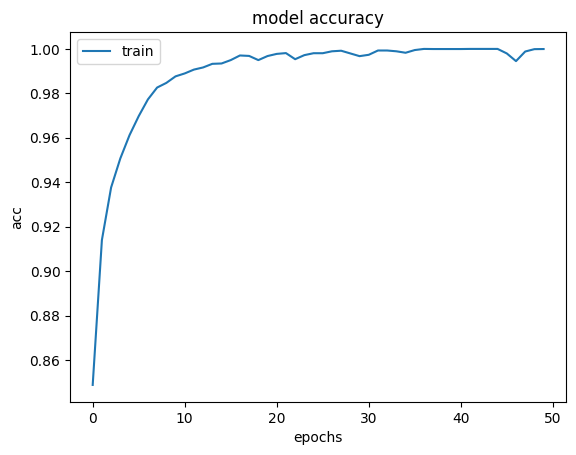

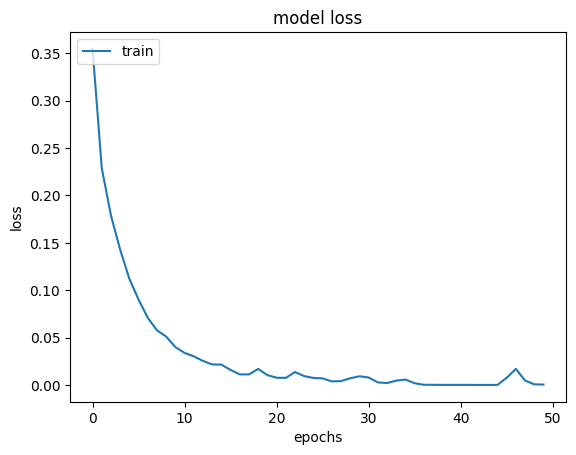

In [ ]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('TextModel.keras')

#### Chạy thử mô hình

In [ ]:
def Test_Review(message):
  print(message)
  seq = tokenizer.texts_to_sequences(message)

  padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)

  pred = model.predict(padded)

  labels = ['Negative','Positive']
  print(pred, labels[np.argmax(pred)])

In [ ]:
Test_Review([data['Review'][17004]])

['jakarta to bandar seri begawan. my first trip with this airline i really enjoyed in cabin, even though the flight was delayed 4 hours. best ground staff and very good for handling a delayed flight. they treated passengers in good service. cabin crew nice and polite and meals on board fantastic']
1/1 [==============================] - 0s 25ms/step
[[1.6377865e-18 1.0000000e+00]] Positive


In [ ]:
Test_Review([data['Review'][19508]])

["flight has been delayed several times. it is supposed to take off at 11. after 3 postponed departures now it is scheduled for 5.30 hope they won't cancel it on me. what a nightmare. i am still stuck at las vegas airport. earlier, 2 flights have left for toronto already. i made a mistake choosing swoop. a word to the wise: do not - repeat- do not fly this airline. anger, frustration, missed flights will result."]
1/1 [==============================] - 0s 38ms/step
[[1.0000000e+00 1.0820459e-15]] Negative


In [ ]:
Test_Review(['My flight was delayed because of maintenance. There was a thunderstorm coming into Dallas. We had to hold our altitude for an extra hour. We finally landed 1 1/2 hours late. I have now been sitting on the runway waiting for a gate. I have been sitting here for literally 1:45 minutes. All the other airlines are going to a gate. Seriously, why are we still sitting here. This was such a terrible management call from frontier. Why make us sit for 2 hours with the engine exhaust blowing in the air conditioner. I will never fly Frontier again!'])

['My flight was delayed because of maintenance. There was a thunderstorm coming into Dallas. We had to hold our altitude for an extra hour. We finally landed 1 1/2 hours late. I have now been sitting on the runway waiting for a gate. I have been sitting here for literally 1:45 minutes. All the other airlines are going to a gate. Seriously, why are we still sitting here. This was such a terrible management call from frontier. Why make us sit for 2 hours with the engine exhaust blowing in the air conditioner. I will never fly Frontier again!']
1/1 [==============================] - 0s 78ms/step
[[1.000000e+00 1.006416e-11]] Negative


In [ ]:
Test_Review(['Manchester to Copenhagen via London on 30th April 2024 Aircrafts were A319 and A320, respectively, both in decent condition. I arrived from Africa, and had to transit and change terminal to T3, which is very cumbersome and tedious. Check-in was quick, easy, and professional, got my desired seats due to silver status at BA. From T3 I had to go through one of the worst security checks ever encountered, fragmenting almost every item in my carry-ons. Their Escape Lounge in T3 is quite decent, particular beer choices and prosecco sparkling wine. Food was very poor, neither any savoury snacks nor meaty food at all. Good tarmac view. First flight was delayed, forcing me to catch the 2nd in LHR within ½ hour. However, I was informed clearly at gate upon arriving in LHR, assisting me on next gate and the airline managed to transfer the luggage in this extremely narrow timeslot. Onboard, only a mini-bottle of water and some bagged crumbs were given, fairly useless and superfluous. No IFE or WiFi. Annoying charity beggings from FAs on both flights are intrusive, annoying, disrespectful, and degrades the airline. Offerings onboard like discount carriers, except being pricier. Arrived final destination on time and so did my luggage.'])

['Manchester to Copenhagen via London on 30th April 2024 Aircrafts were A319 and A320, respectively, both in decent condition. I arrived from Africa, and had to transit and change terminal to T3, which is very cumbersome and tedious. Check-in was quick, easy, and professional, got my desired seats due to silver status at BA. From T3 I had to go through one of the worst security checks ever encountered, fragmenting almost every item in my carry-ons. Their Escape Lounge in T3 is quite decent, particular beer choices and prosecco sparkling wine. Food was very poor, neither any savoury snacks nor meaty food at all. Good tarmac view. First flight was delayed, forcing me to catch the 2nd in LHR within ½ hour. However, I was informed clearly at gate upon arriving in LHR, assisting me on next gate and the airline managed to transfer the luggage in this extremely narrow timeslot. Onboard, only a mini-bottle of water and some bagged crumbs were given, fairly useless and superfluous. No IFE or Wi